# JEU DE DONNEES CREDIT RISK

la premiere chose a faire est de bien comprendre la description des donnees a manipuler

## I-EXPLORATION DES DONNEES

In [ ]:
#importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#chargement du dataset
dataset='7-credit_risk_dataset.csv'
df = pd.read_csv(dataset)

In [ ]:

#affichage des 5 premieres lignes du dataset
df.head(5)

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [ ]:

#precisons  la variable cible
cible='loan_status'

### a-analyse de la forme des données

In [ ]:
#visualisation du type des donnees
df.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object>

In [ ]:
#selectionner

df1= df.drop(cible, axis=1)
df1
#selection des variables categorielles
categorial_data=df1.select_dtypes('object')
#selection des variables numeriques
numerical_data=df1.select_dtypes(['float','int'])

In [ ]:
#nombre de variables par type de donnees
print("nous avons ",categorial_data.shape[1],"donnee(s) categorielles(s)")
print("nous avons ",numerical_data.shape[1],"donnee(s) numerique(s)")


nous avons  4 donnee(s) categorielles(s)
nous avons  7 donnee(s) numerique(s)


<Axes: >

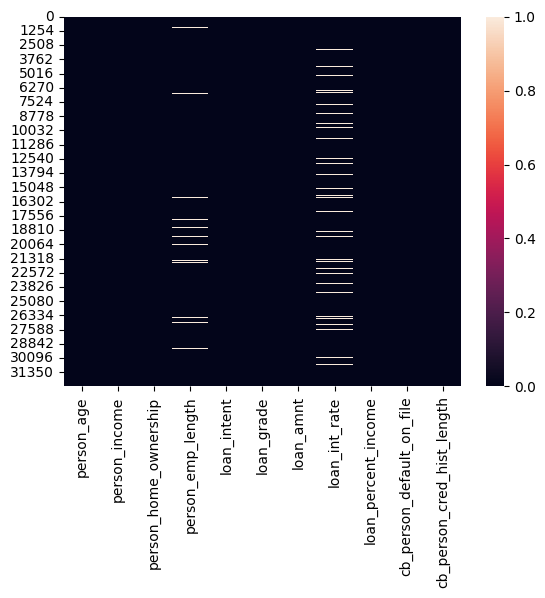

In [ ]:
#MATRICES DES VALEURS MANQUANTES
sns.heatmap(df1.isna())

de cette matrice nous pouvons identifier que 2 variables ont des valeurs manquantes a savoir:


1.   Loan_int_rate
2.   Person_emp_lenght



In [ ]:
#visualisation du nombre exact de valeurs manquantes
df1.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<ipython-input-10-cdbb341598e2>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

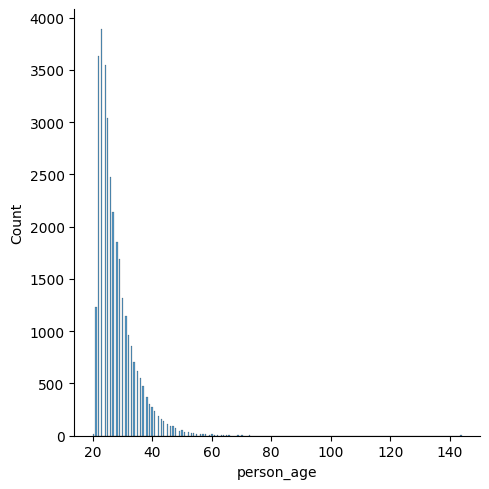

<Figure size 640x480 with 0 Axes>

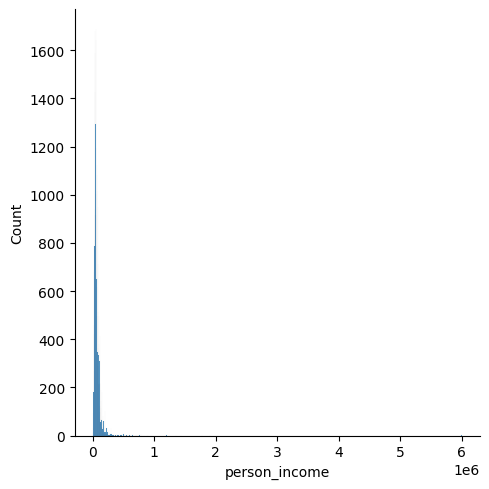

<Figure size 640x480 with 0 Axes>

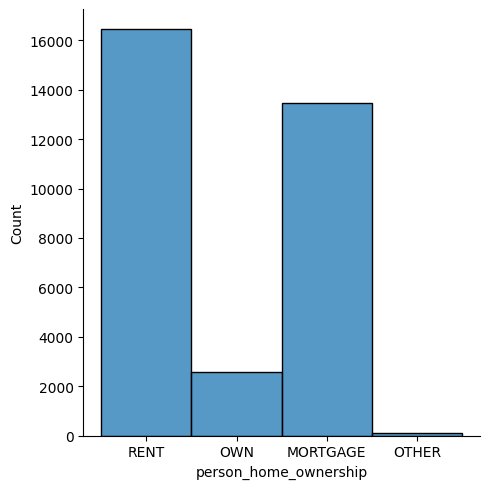

<Figure size 640x480 with 0 Axes>

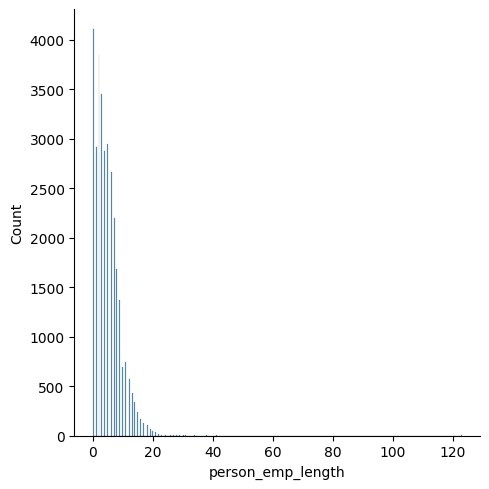

<Figure size 640x480 with 0 Axes>

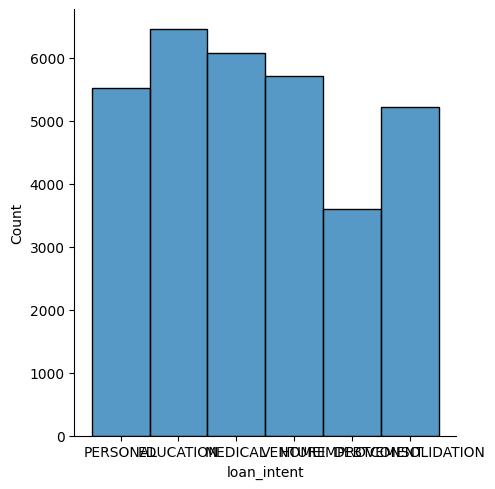

<Figure size 640x480 with 0 Axes>

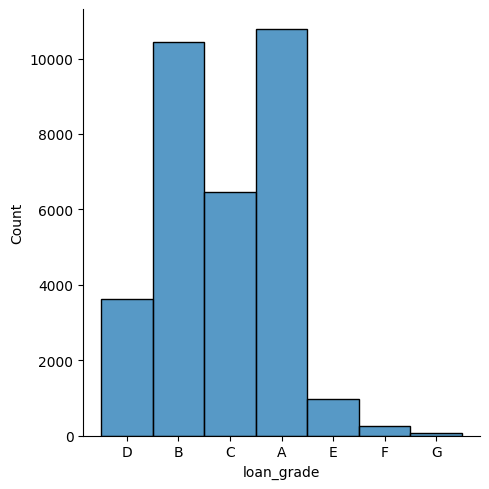

<Figure size 640x480 with 0 Axes>

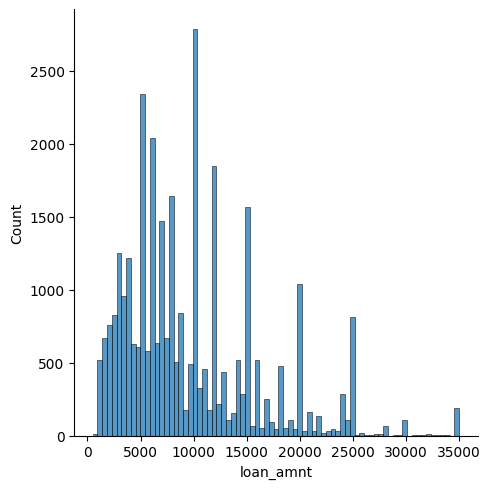

<Figure size 640x480 with 0 Axes>

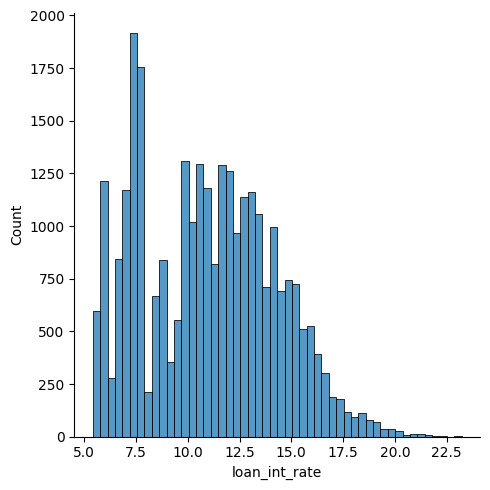

<Figure size 640x480 with 0 Axes>

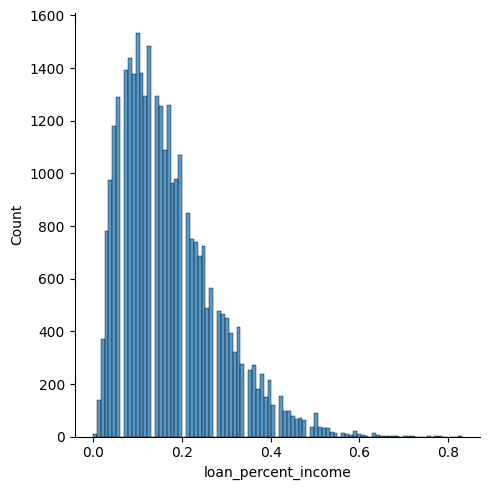

<Figure size 640x480 with 0 Axes>

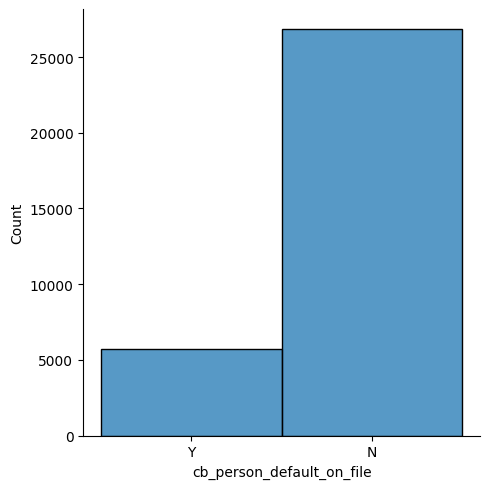

<Figure size 640x480 with 0 Axes>

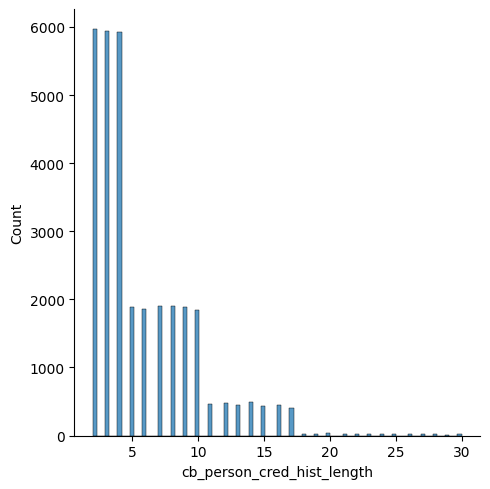

In [ ]:
#histogramme des variables
for col in df1.columns:
  plt.figure()
  sns.displot(df1[col])

<ipython-input-11-a6f76723f535>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

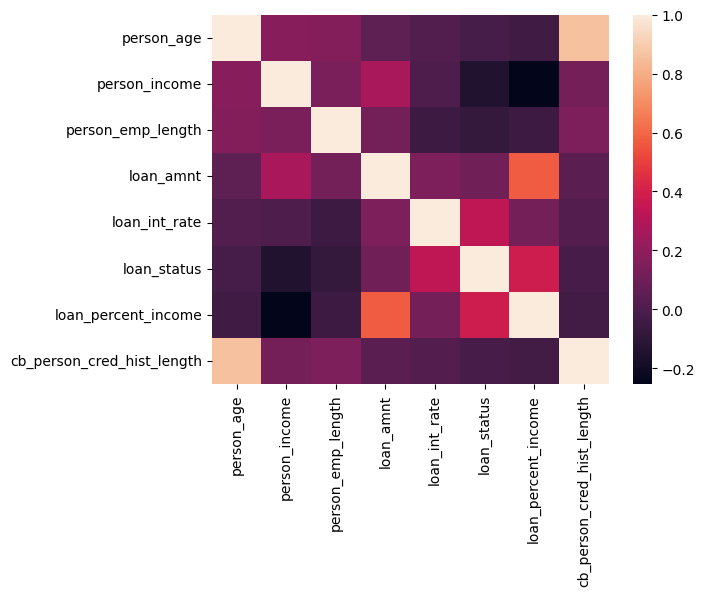

In [ ]:
#matrice de correlation des variables
sns.heatmap(df.corr())

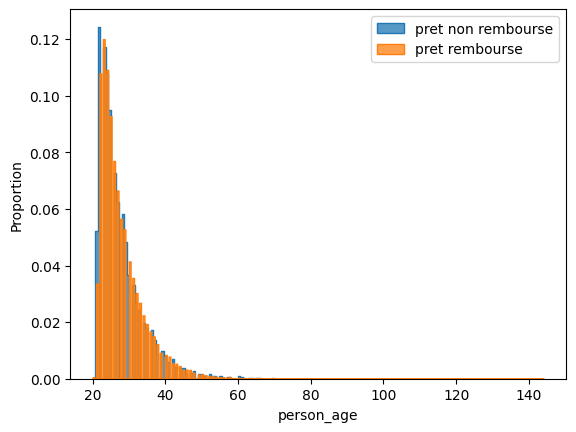

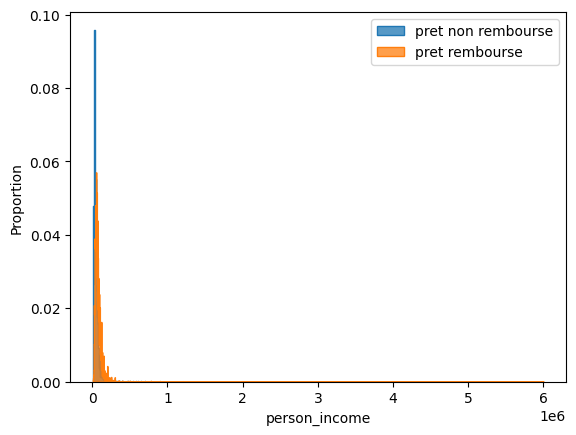

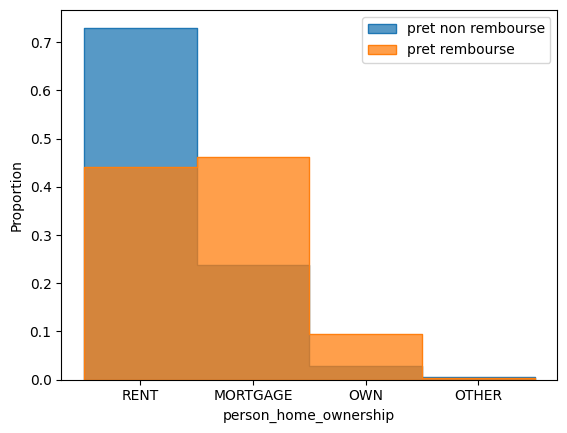

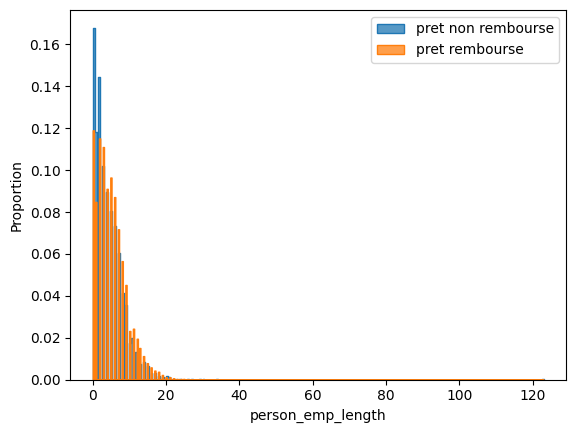

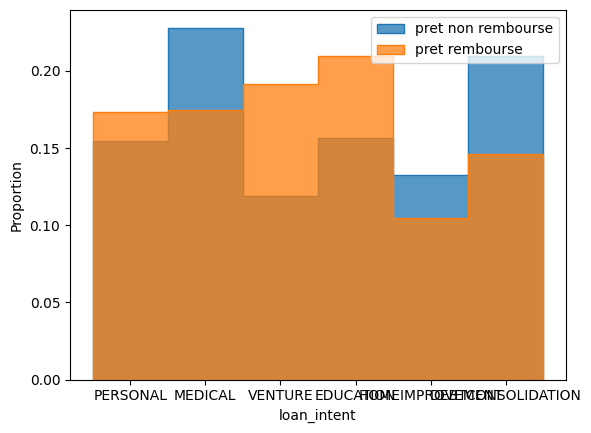

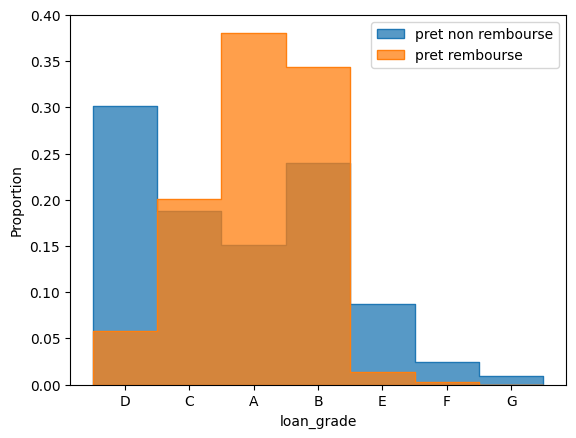

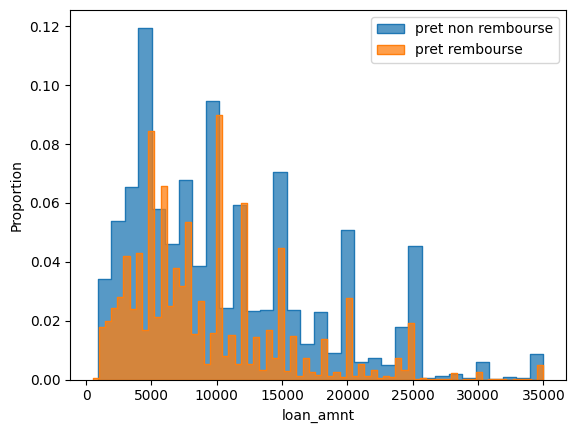

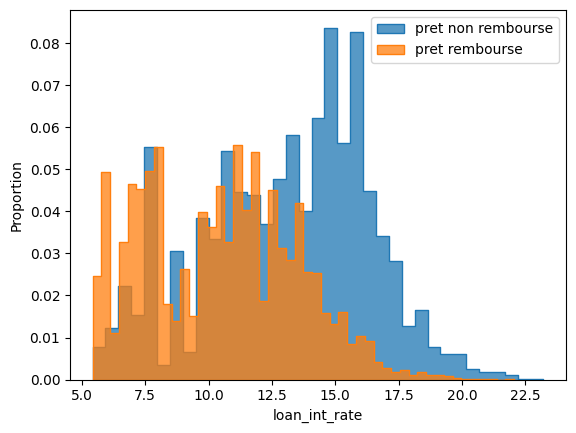

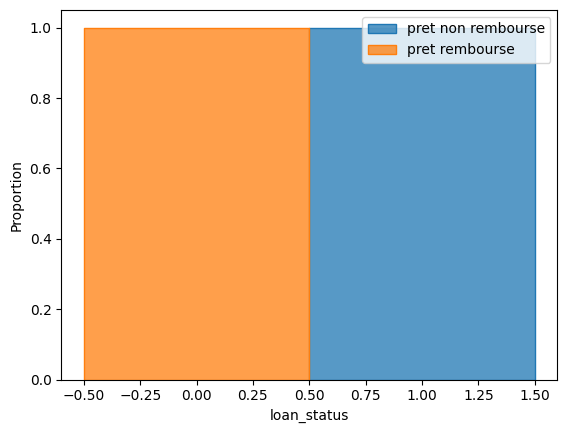

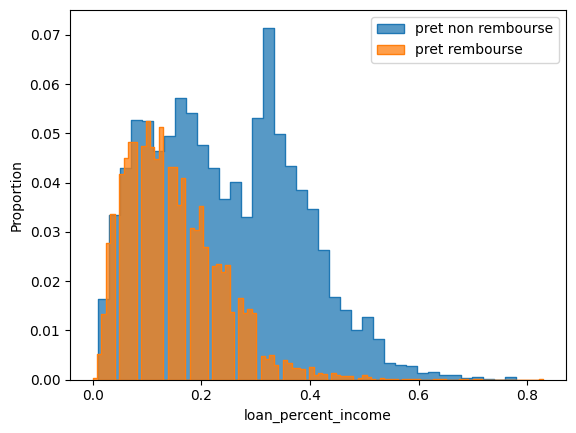

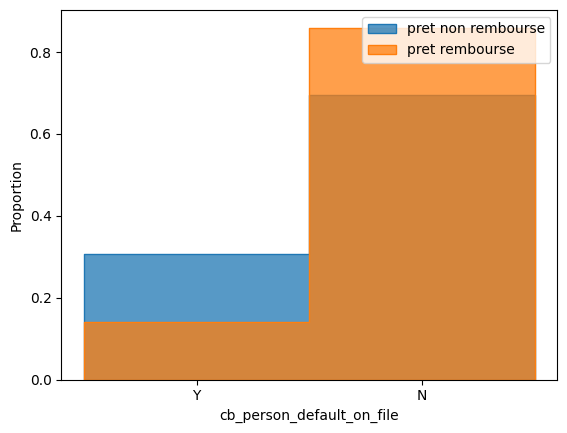

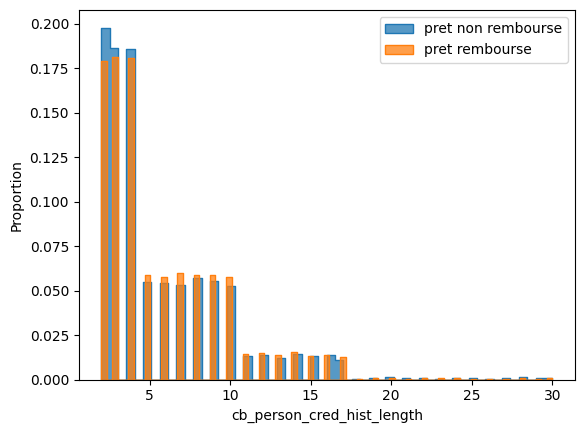

In [ ]:
#visualisation des valeurs des variables par labels
positive_df = df[df[cible] == 0]
negative_df = df[df[cible] == 1]
for col in positive_df.columns:
  plt.figure()
  sns.histplot(negative_df[col], label = 'pret non rembourse', stat = 'proportion', element = 'step')
  sns.histplot(positive_df[col], label = 'pret rembourse',stat = 'proportion', element = 'step')
  plt.legend()

## b-pretraitement des donnees

In [ ]:
#remplacement des valeurs manquantes
df.interpolate(method ='linear', limit_direction ='backward', inplace=True)

In [ ]:
#encodage des donnees
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
le=LabelEncoder()
for colum in categorial_data.columns:
  df[colum]=le.fit_transform(df[colum])



In [ ]:
#mormalisation des valeurs numeriques

for col in numerical_data.columns:
  means=np.mean(df[col],axis=0)
  stds=np.std(df[col],axis=0)
  df[col]=(df[col]-means)/stds

In [ ]:
#visualisation des donnees pretraitees
df

person_age  person_income  person_home_ownership  person_emp_length  \
0       -0.903374      -0.114143                      3          28.755261   
1       -1.060904      -0.911147                      2           0.053606   
2       -0.430783      -0.911147                      0          -0.919331   
3       -0.745843      -0.009274                      3          -0.189628   
4       -0.588313      -0.188358                      3           0.783309   
...           ...            ...                    ...                ...   
32576    4.610190      -0.210945                      0          -0.919331   
32577    4.137599       0.870011                      0          -0.189628   
32578    5.870433       0.160129                      3          -0.432863   
32579    4.452660       1.354021                      0           0.053606   
32580    6.027964      -0.388416                      3          -0.676097   

       loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  \
0                4           3   4.019404       1.582287            1   
1                1           1  -1.358650       0.040341            0   
2                3           2  -0.646849       0.586973            1   
3                3           2   4.019404       1.332669            1   
4                3           2   4.019404       1.029335            1   
...            ...         ...        ...            ...          ...   
32576            4           2  -0.599395       0.678605            0   
32577            4           0   1.271060      -1.112959            0   
32578            2           1   4.019404      -0.007055            1   
32579            4           1   0.855843       0.147771            0   
32580            3           1  -0.492625      -0.323028            0   

       loan_percent_income  cb_person_default_on_file  \
0                 3.931411                          1   
1                -0.657458                          0   
2                 3.744110                          0   
3                 3.369508                          0   
4                 3.556809                          1   
...                    ...                        ...   
32576            -0.563808                          0   
32577            -0.189207                          0   
32578             2.713956                          0   
32579            -0.657458                          0   
32580            -0.189207                          0   

       cb_person_cred_hist_length  
0                       -0.691554  
1                       -0.938167  
2                       -0.691554  
3                       -0.938167  
4                       -0.444942  
...                           ...  
32576                    5.966992  
32577                    3.254251  
32578                    5.473767  
32579                    4.980541  
32580                    5.966992  

[32581 rows x 12 columns]

### examen de la colonne cible

In [ ]:
df[cible].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

### relations entre les variables quantitatives et la cible

In [ ]:

positive_df = df[df[cible] == 1]
negative_df = df[df[cible] == 0]

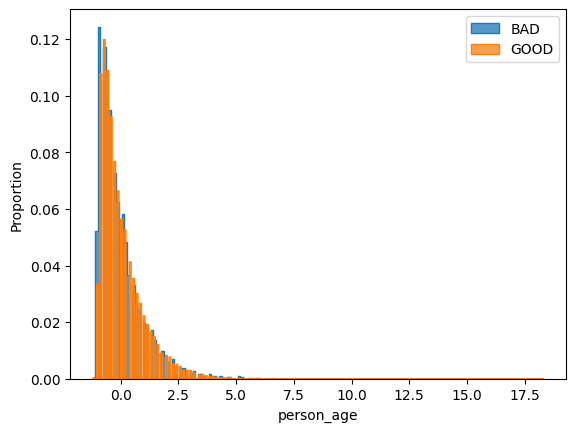

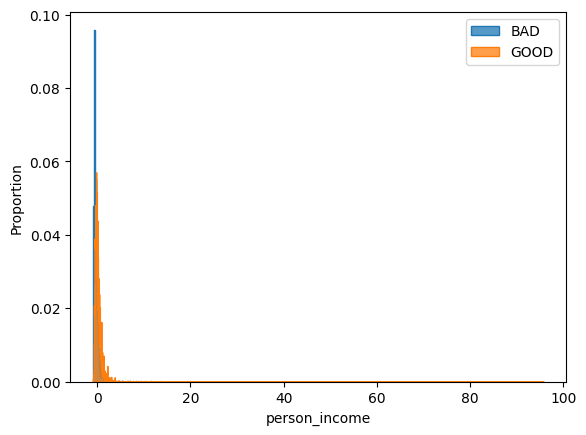

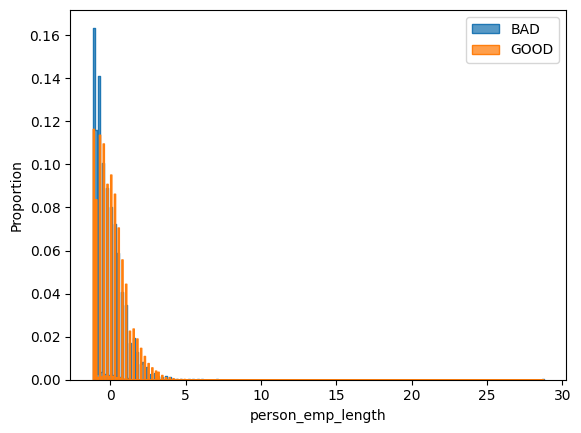

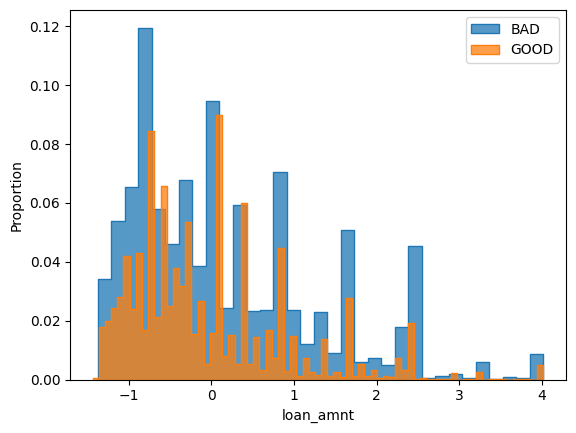

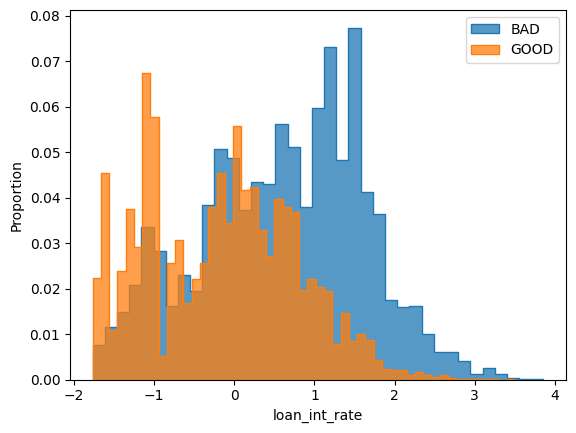

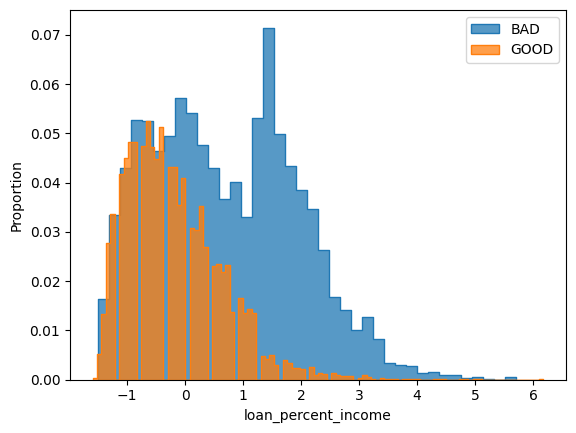

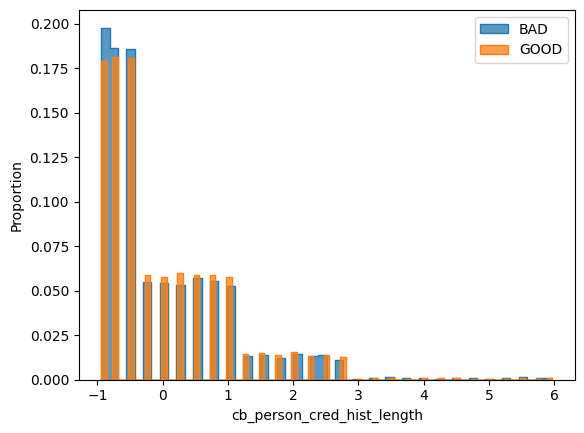

In [ ]:
liste = ['person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length' ]
for col in numerical_data.columns:
  plt.figure()
  sns.histplot(positive_df[col], label = 'BAD', stat = 'proportion', element = 'step')
  sns.histplot(negative_df[col], label = 'GOOD',stat = 'proportion', element = 'step')
  plt.legend()


### relations entre les variables qualitatives et la cible

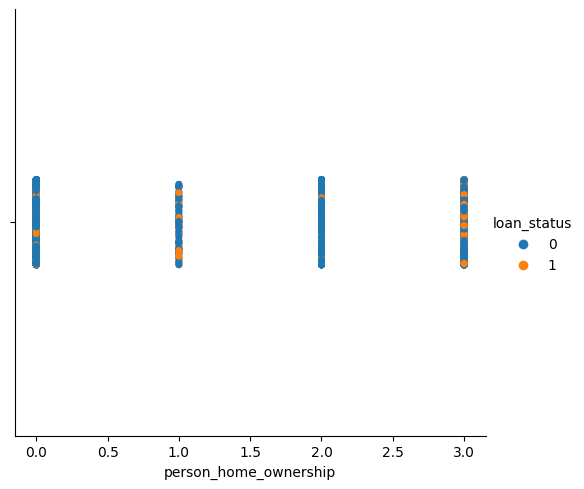

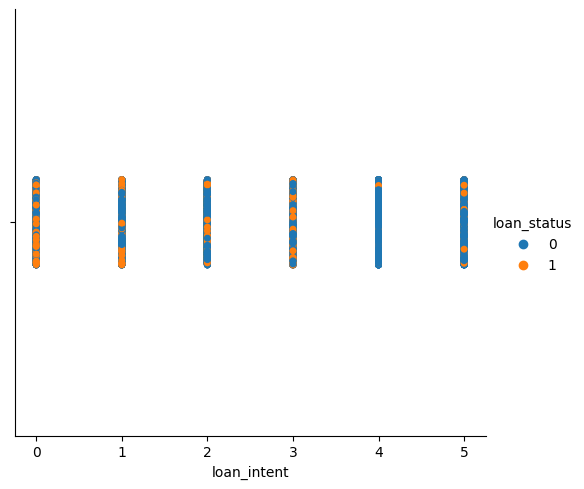

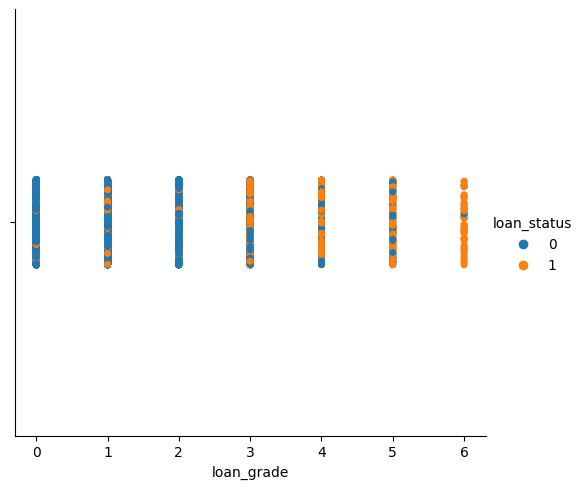

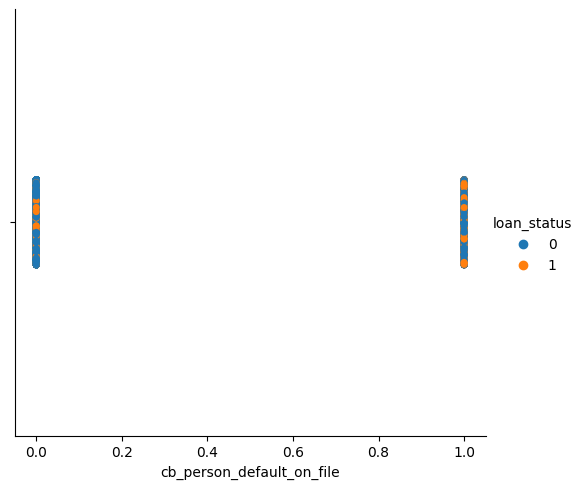

In [ ]:
for col in categorial_data.columns:
  sns.catplot(data=df, x=col, hue=cible, kind="strip")

In [ ]:
#importation des bibliotheque
from sklearn.model_selection import train_test_split
#ici
train, test = train_test_split(df, test_size = 0.2, random_state=42)

### division du jeu de données

In [ ]:
x_train = train.drop(cible, axis=1)
x_test =  test.drop(cible, axis=1)
y_train = train[cible]
y_test =  test[cible]

#II- Implémentation des différents modèles de classification

## 1- les arbres de décsion

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_graphviz,export_text
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [ ]:
model = DecisionTreeClassifier(random_state=0)

[[4693  379]
 [ 350 1095]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5072
           1       0.74      0.76      0.75      1445

    accuracy                           0.89      6517
   macro avg       0.84      0.84      0.84      6517
weighted avg       0.89      0.89      0.89      6517



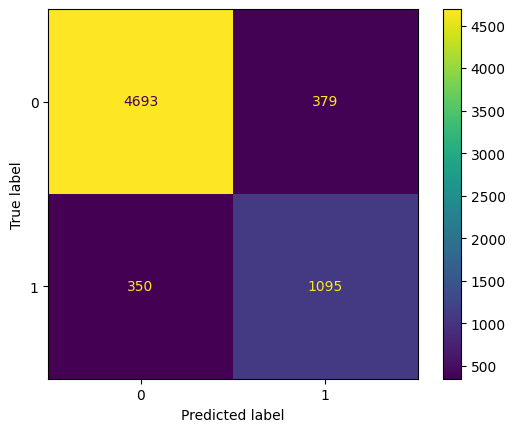

In [ ]:
model.fit(x_train,y_train)
preds = model.predict(x_test)

print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test,preds)).plot()

In [ ]:
#affichage de l'arbre de decision
feature_names = ['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length']
#je limite la profondeur de l'arbre a 5 ainsi on peut faire varier la profondeur pour visualiser
class_names = cible
plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True, max_depth=3)

In [ ]:
#pour une meilleure comprehension des choix faits dans l'arbre nous pouvons utiliser export text
r = export_text(model, feature_names=feature_names)
print(r)

|--- loan_percent_income <= 1.26
|   |--- loan_grade <= 2.50
|   |   |--- person_income <= -0.74
|   |   |   |--- loan_percent_income <= -0.14
|   |   |   |   |--- person_age <= -0.04
|   |   |   |   |   |--- person_income <= -0.84
|   |   |   |   |   |   |--- loan_int_rate <= 1.34
|   |   |   |   |   |   |   |--- loan_percent_income <= -0.61
|   |   |   |   |   |   |   |   |--- loan_int_rate <= -0.16
|   |   |   |   |   |   |   |   |   |--- person_income <= -0.90
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- person_income >  -0.90
|   |   |   |   |   |   |   |   |   |   |--- person_income <= -0.86
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- person_income >  -0.86
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- loan_int_rate >  -0.16
|   |   |   |   |   |   |   |   |   |--- person_income <= -0.87
|   |   |   |   |   |   |   |   |   |

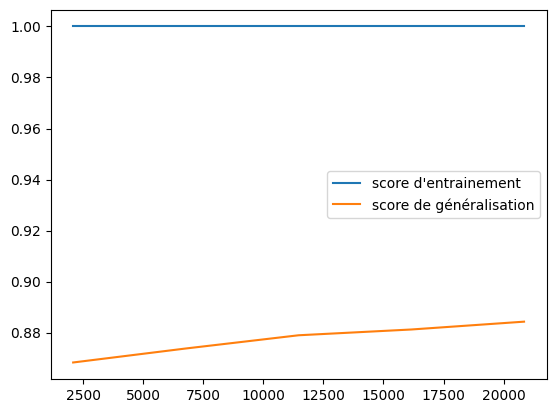

In [ ]:
N, train_score, val_score = learning_curve(model, x_train, y_train)
plt.figure()
plt.plot(N, train_score.mean(axis=1), label = "score d'entrainement")
plt.plot(N, val_score.mean(axis=1), label = "score de généralisation")
plt.legend()

#2-implementation des svm

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      5072
           1       0.87      0.56      0.68      1445

    accuracy                           0.88      6517
   macro avg       0.88      0.77      0.81      6517
weighted avg       0.88      0.88      0.88      6517



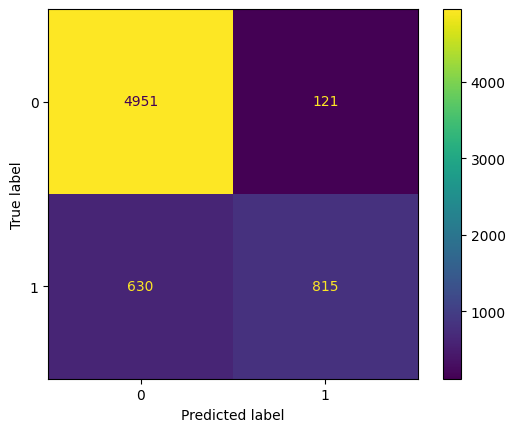

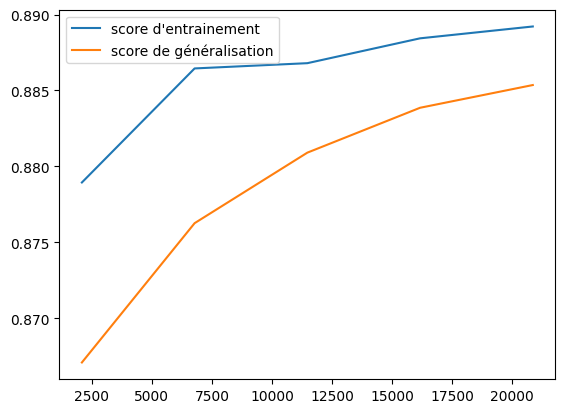

In [ ]:
from sklearn import svm
svmc= svm.SVC()
svmc.fit(x_train, y_train)
preds = svmc.predict(x_test)


from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test,preds)).plot()

print(classification_report(y_test,preds))
N, train_score, val_score = learning_curve(svmc, x_train, y_train)
plt.figure()
plt.plot(N, train_score.mean(axis=1), label = "score d'entrainement")
plt.plot(N, val_score.mean(axis=1), label = "score de généralisation")
plt.legend()

# 3-implementation de la regression logistique

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model_lg = LogisticRegression()
model_lg.fit(x_train, y_train)
model_lg_acc_pred=model_lg.predict(x_test)
model_lg_acc = cross_val_score(estimator=model_lg, X=x_train, y=y_train, cv=5, n_jobs=-1)
model_lg_acc

array([0.85133321, 0.84596202, 0.84960675, 0.84059083, 0.84382195])

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5072
           1       0.72      0.44      0.54      1445

    accuracy                           0.84      6517
   macro avg       0.79      0.69      0.72      6517
weighted avg       0.83      0.84      0.82      6517

matrice de confusion avec le model de regression logistique:


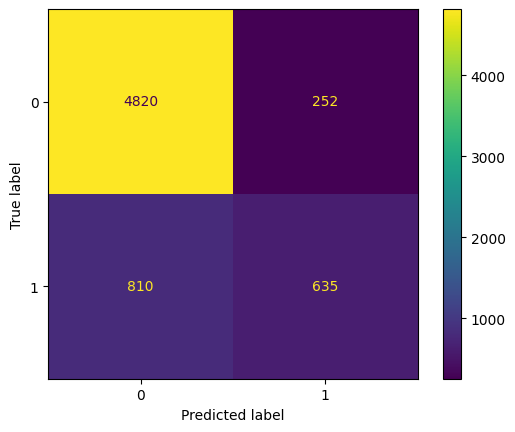

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(classification_report(y_test,model_lg_acc_pred))
print("matrice de confusion avec le model de regression logistique:")
cm = confusion_matrix(y_test, model_lg_acc_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5072
           1       0.72      0.44      0.54      1445

    accuracy                           0.84      6517
   macro avg       0.79      0.69      0.72      6517
weighted avg       0.83      0.84      0.82      6517



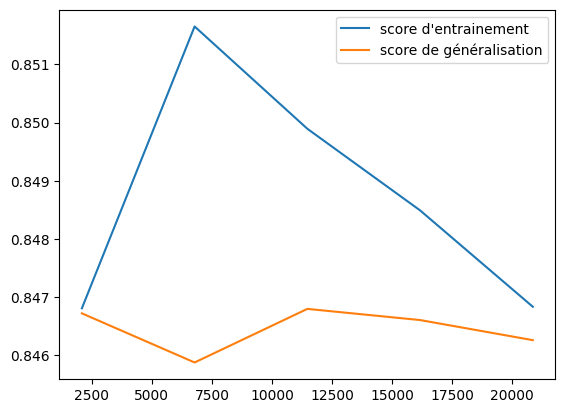

In [ ]:
print(classification_report(y_test,model_lg_acc_pred))

N, train_score, val_score = learning_curve(model_lg, x_train, y_train)
plt.figure()
plt.plot(N, train_score.mean(axis=1), label = "score d'entrainement")
plt.plot(N, val_score.mean(axis=1), label = "score de généralisation")
plt.legend()

#4-implementation de random forest

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5072
           1       0.97      0.70      0.81      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.85      0.89      6517
weighted avg       0.93      0.93      0.92      6517



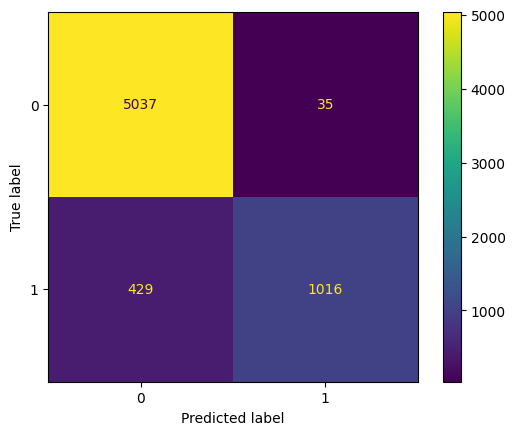

In [ ]:

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train);

preds = rf.predict(x_test)

print(classification_report(y_test,preds))

from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test,preds)).plot()

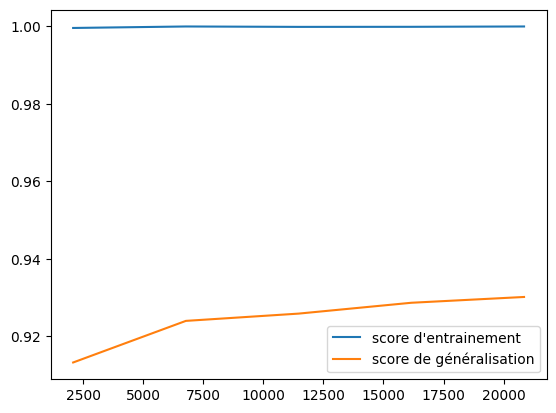

In [ ]:

N, train_score, val_score = learning_curve(rf, x_train, y_train)
plt.figure()
plt.plot(N, train_score.mean(axis=1), label = "score d'entrainement")
plt.plot(N, val_score.mean(axis=1), label = "score de généralisation")
plt.legend()

# 5-implementation de xgboost

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      5072
           1       0.75      0.73      0.74      1445

    accuracy                           0.89      6517
   macro avg       0.84      0.83      0.83      6517
weighted avg       0.88      0.89      0.88      6517



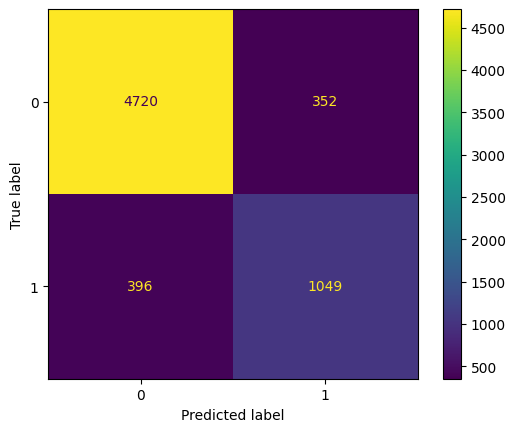

In [ ]:
from xgboost import XGBClassifier
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(x_train, y_train)
# make predictions
preds = bst.predict(x_test)


print(classification_report(y_test,preds))

from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test,preds)).plot()

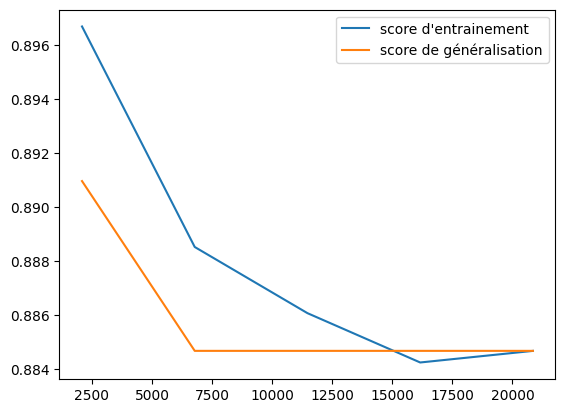

In [ ]:
N, train_score, val_score = learning_curve(bst, x_train, y_train)
plt.figure()
plt.plot(N, train_score.mean(axis=1), label = "score d'entrainement")
plt.plot(N, val_score.mean(axis=1), label = "score de généralisation")
plt.legend()

# III-OPTIMISATION DES MODELES

#1-ARBRE DE DECISION

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV


In [ ]:
# param_grid = {
#     'criterion': ['gini', 'entropy'],  # Mesure de qualité de la division
#     'max_depth': [None, 5, 10],  # Profondeur maximale de l'arbre
#     'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud
#     'min_samples_leaf': [1, 2, 4]  # Nombre minimum d'échantillons requis dans une feuille
# }


In [ ]:
# dt = DecisionTreeClassifier()


In [ ]:
# grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)  # X_train et y_train représentent vos données d'entraînement


In [ ]:
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_


In [ ]:
# best_dt = DecisionTreeClassifier(**best_params)
# best_dt.fit(X_train, y_train)


In [ ]:
dtclf = DecisionTreeClassifier(random_state=42)


hyperparameter_space = {'max_depth':[2,3,4,5,7,6,7,8,], # Profondeur maximale de l'arbre
                        'min_samples_leaf':[1,2,4,7,10], # Nombre minimum d'échantillons requis pour diviser un nœud
                        'min_samples_split':[1,2,3,7,10] # Nombre minimum d'échantillons requis dans une feuille
}

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(dtclf, param_grid=hyperparameter_space,scoring="accuracy", n_jobs=-1, cv=10, return_train_score=True)

gs.fit(x_train, y_train)
print("Optimal hyperparameter combination:", gs.best_params_)
print()
# print("Mean cross-validated training accuracy score:", gs.best_score_)
gs.best_estimator_.fit(x_train, y_train)
y_pred = gs.best_estimator_.predict(x_test) # Predictions
y_true = y_test # True values


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
400 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _val

Optimal hyperparameter combination: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 7}



              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5072
           1       0.96      0.70      0.81      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.84      0.88      6517
weighted avg       0.93      0.93      0.92      6517

matrice de confusion avec le model des arbres de decision optimise :


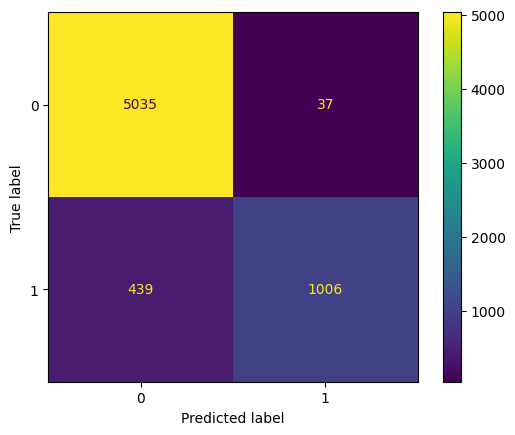

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print("matrice de confusion avec le model des arbres de decision optimise :")
cm = confusion_matrix(y_true, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

#2- svm

In [ ]:
# Defining 3-dimensional hyperparameter space as a Python dictionary
from sklearn import svm
from sklearn.model_selection import GridSearchCV

svm = svm.SVC()

hyperparameter_space = param_grid = {
    'C': [0.1,1,10,3],  # Paramètre de régularisation
    'kernel': [ 'rbf'],  # Noyau utilisé pour la fonction de décision
    'gamma': ['scale', 'auto']  # Coefficient du noyau pour 'rbf'
}

svmop= GridSearchCV(svm, param_grid=hyperparameter_space,scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)

svmop.fit(x_train, y_train)
print("Optimal hyperparameter combination:", svmop.best_params_)
print()
print("Mean cross-validated training accuracy score:", svmop.best_score_)
svmop.best_estimator_.fit(x_train, y_train)
y_pred = svmop.best_estimator_.predict(x_test) # Predictions
y_true = y_test # True values


Optimal hyperparameter combination: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

Mean cross-validated training accuracy score: 0.9091083366377966


In [ ]:
print(" les metriques pour  random SVM optimisee  est de :")
print( classification_report(y_true,y_pred))

 les metriques pour  random SVM optimisee  est de :
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5072
           1       0.89      0.64      0.75      1445

    accuracy                           0.90      6517
   macro avg       0.90      0.81      0.84      6517
weighted avg       0.90      0.90      0.90      6517



matrice de confusion avec le svm optimise:


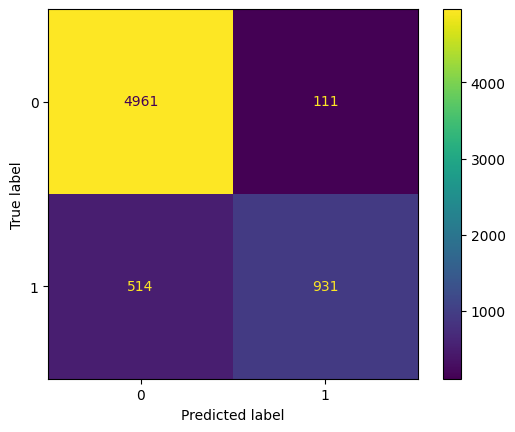

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("matrice de confusion avec le svm optimise:")
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

# 3- REGRESSION LOGISTIQUE

In [ ]:
from sklearn.linear_model import LogisticRegression
# help(LogisticRegression)


In [ ]:
# Defining 3-dimensional hyperparameter space as a Python dictionary
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model_lg = LogisticRegression()

hyperparameter_space = {
    'penalty': ['l1', 'l2'],  # Type de pénalité (l1 ou l2)
    'C': [0.1,0.5, 1,2,3,7, 10],  # Inverse de la force de régularisation
    'solver': ['liblinear', 'lbfgs', 'saga']  # Algorithme de résolution
}

model_lg= GridSearchCV(model_lg, param_grid=hyperparameter_space,scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)

model_lg.fit(x_train, y_train)
print("Optimal hyperparameter combination:", model_lg.best_params_)
print()
print("Mean cross-validated training accuracy score:", model_lg.best_score_)
model_lg.best_estimator_.fit(x_train, y_train)
y_pred = model_lg.best_estimator_.predict(x_test) # Predictions
y_true = y_test # True values

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

Optimal hyperparameter combination: {'C': 3, 'penalty': 'l1', 'solver': 'saga'}

Mean cross-validated training accuracy score: 0.846492882819471


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
print(" les metriques pour  la regression logistique optimisee  est de :")
print( classification_report(y_true,y_pred))

 les metriques pour  la regression logistique optimisee  est de :
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5072
           1       0.72      0.44      0.54      1445

    accuracy                           0.84      6517
   macro avg       0.79      0.69      0.72      6517
weighted avg       0.82      0.84      0.82      6517



matrice de confusion avec le regression logistique optimisee:


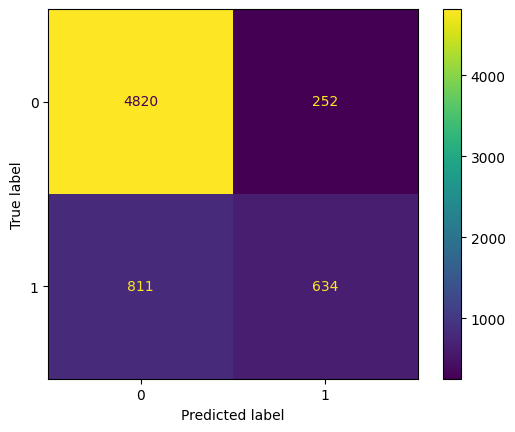

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("matrice de confusion avec le regression logistique optimisee:")
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

# 4-RANDOM FOREST

In [ ]:
param_grid = {
    'n_estimators': [30,25,100, 200, 300],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 5, 10],  # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4]  # Nombre minimum d'échantillons requis dans une feuille
}


In [ ]:
rf = RandomForestClassifier()


In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)  # X_train et y_train représentent vos données d'entraînement


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [30, 25, 100, 200, 300]})

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(x_train, y_train)
y_pred = best_rf.predict(x_test) # Predictions
y_true = y_test # True values


In [ ]:
print(" les metriques pour  la regression random forest optimisee  sont :")
print( classification_report(y_true,y_pred))

 les metriques pour  la regression random forest optimisee  sont :
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5072
           1       0.97      0.71      0.82      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517



matrice de confusion avec random forest optimisee:
 les metriques pour  RandomForest optimisee  est de :
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5072
           1       0.97      0.71      0.82      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517



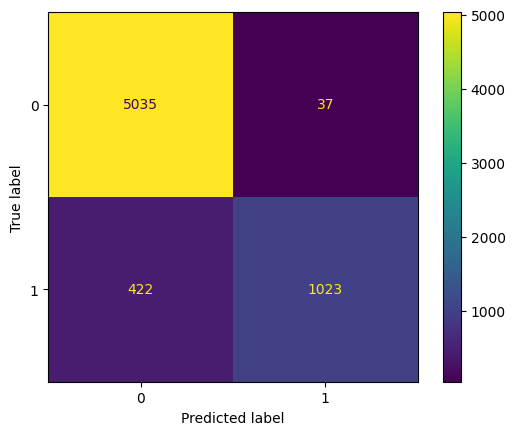

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("matrice de confusion avec random forest optimisee:")
cm = confusion_matrix(y_true, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

print(" les metriques pour  RandomForest optimisee  est de :")
print( classification_report(y_true,y_pred))

# 5- XGBOOST

In [ ]:
hyperparameter_space ={'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05,0.03,0.1], #so called `eta` value
              'max_depth': [5,7,8,9,10],
              'min_child_weight': [11],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

from xgboost import XGBClassifier
model_XG=XGBClassifier()
clf = GridSearchCV(model_XG, hyperparameter_space, n_jobs=5, cv=2,  scoring='roc_auc', verbose=2, refit=True)
clf.fit(x_train, y_train)
print("Optimal hyperparameter combination:", clf.best_params_)
print()
print("Mean cross-validated training accuracy score:", clf.best_score_)
clf.best_estimator_.fit(x_train, y_train)
y_pred = clf.best_estimator_.predict(x_test) # Predictions
y_true = y_test # True values


Fitting 2 folds for each of 15 candidates, totalling 30 fits
Optimal hyperparameter combination: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 5, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'subsample': 0.8}

Mean cross-validated training accuracy score: 0.9103609355806306


In [ ]:
print(" les metriques pour  xgboost optimisee  est de :")
print( classification_report(y_true,y_pred))

 les metriques pour  xgboost optimisee  est de :
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5072
           1       0.90      0.68      0.78      1445

    accuracy                           0.91      6517
   macro avg       0.91      0.83      0.86      6517
weighted avg       0.91      0.91      0.91      6517



matrice de confusion avec xgboost optimisee:


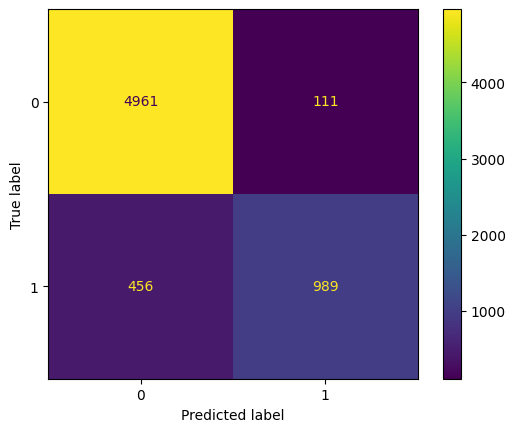

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("matrice de confusion avec xgboost optimisee:")
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

# IV- intepretation des modeles

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importation de shap
import shap




# 1-ARBRE DE DECISION

## a-shap

In [ ]:
# Initialisation de l'explainer SHAP
explainer = shap.Explainer(model)
# Calcul des valeurs SHAP pour les données de test
shap_values = explainer.shap_values(x_test)

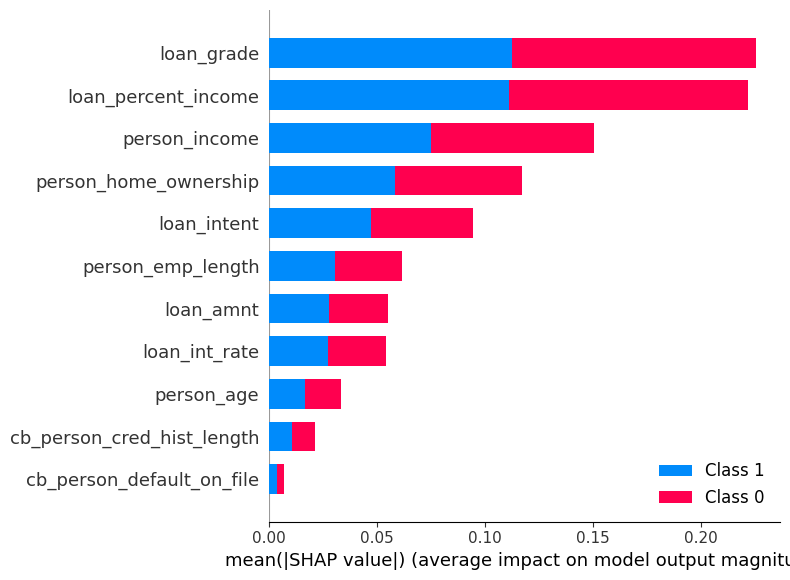

In [ ]:
shap.summary_plot(shap_values, x_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


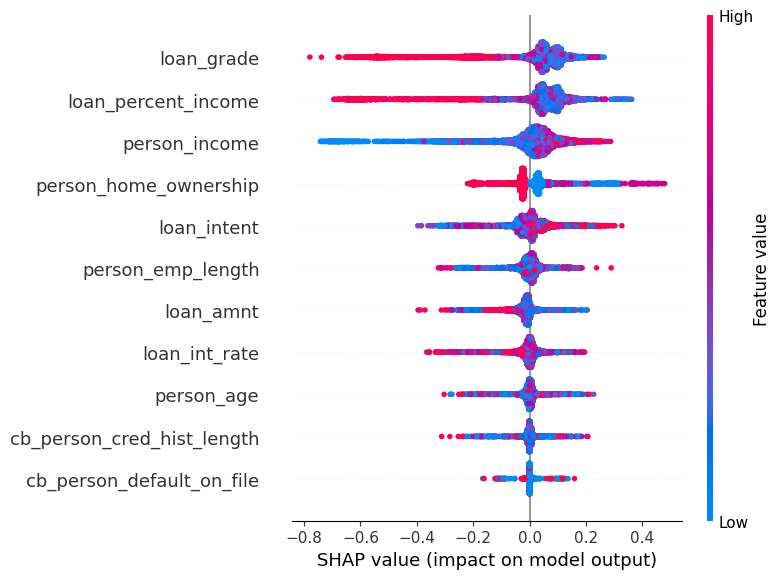

In [ ]:
shap.summary_plot(shap_values[0], x_test)

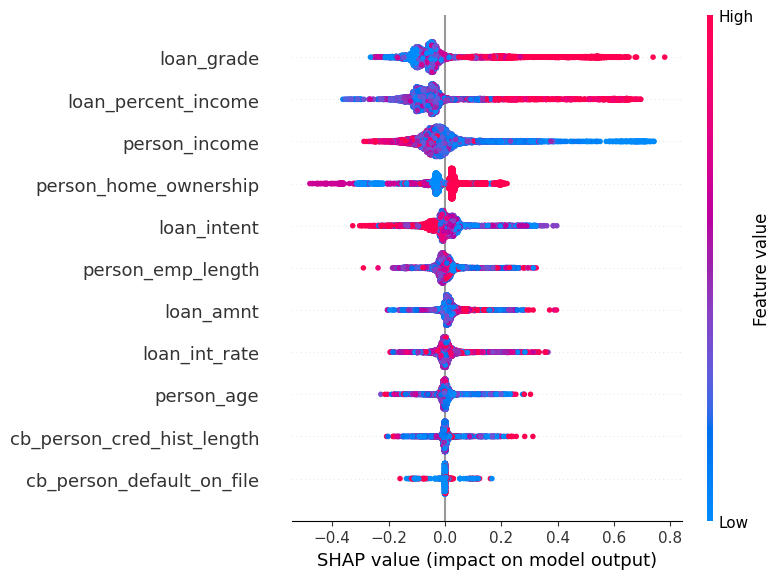

In [ ]:
shap.summary_plot(shap_values[1], x_test)

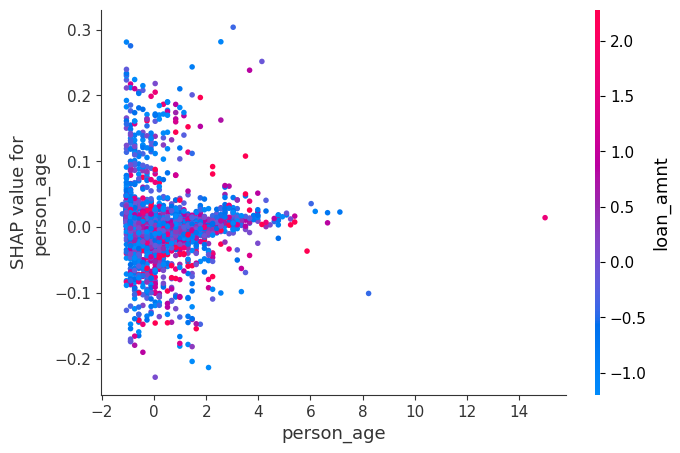

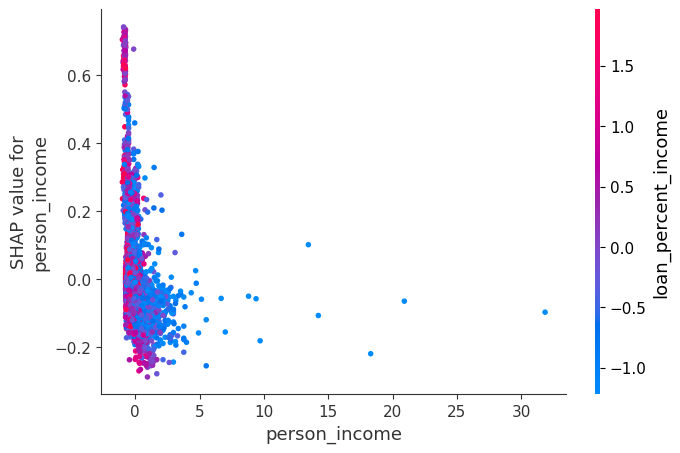

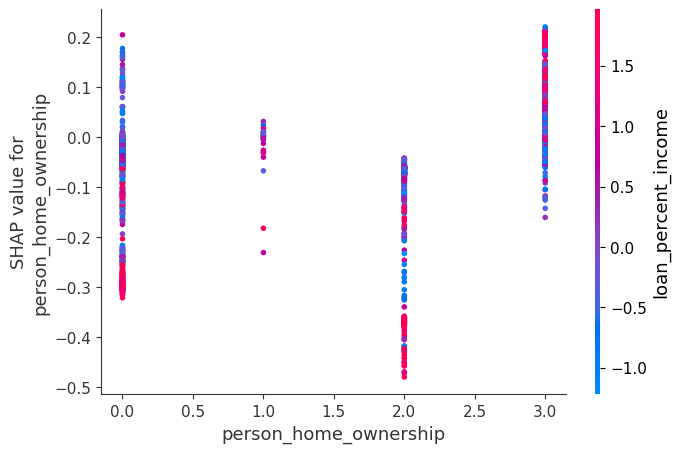

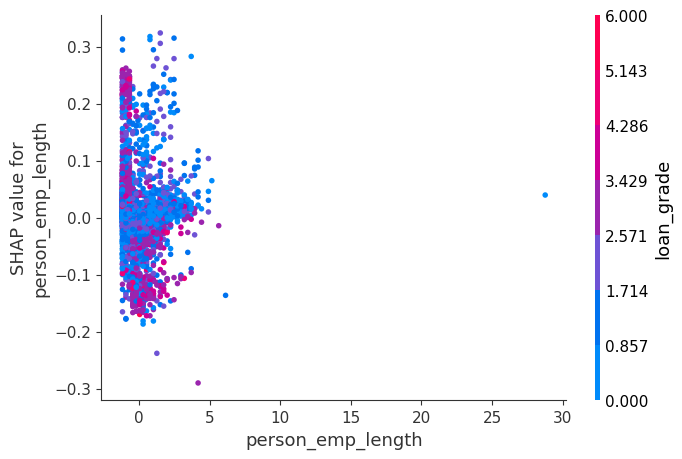

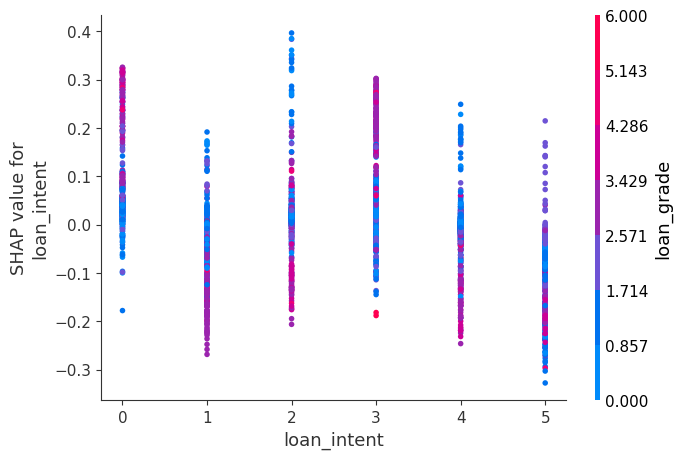

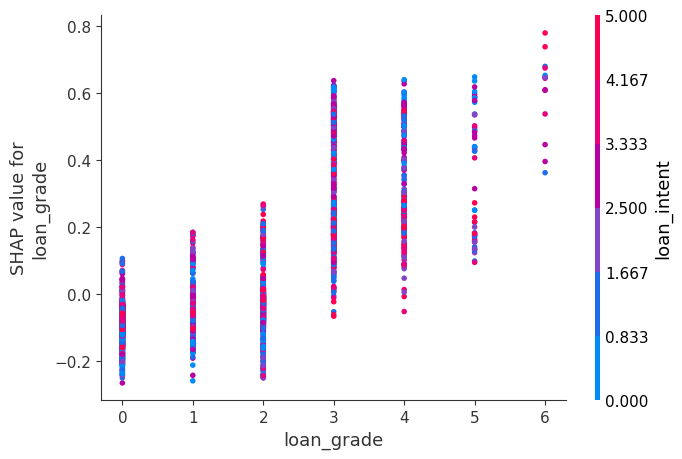

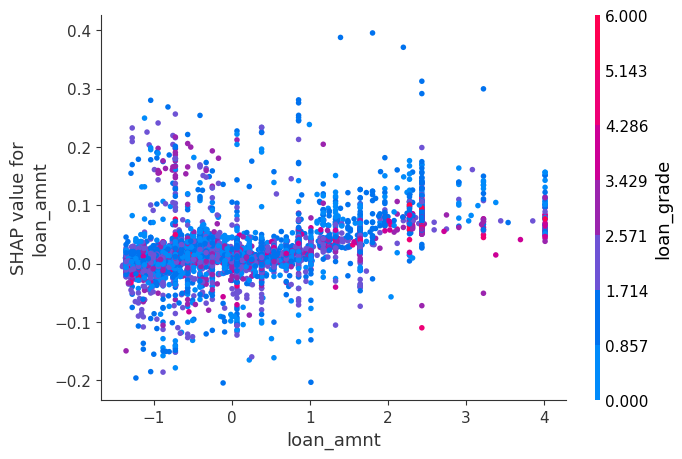

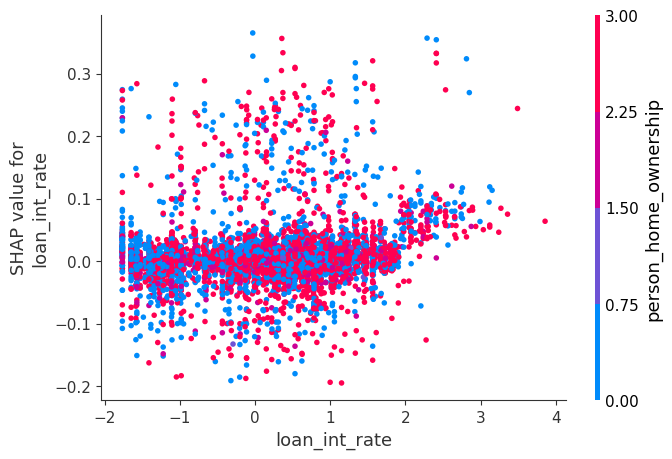

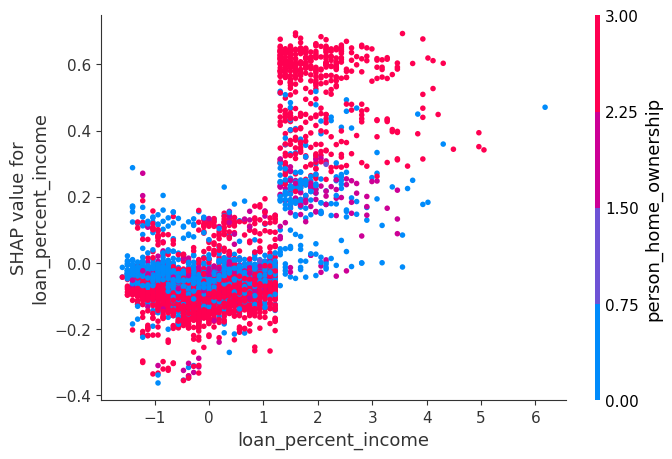

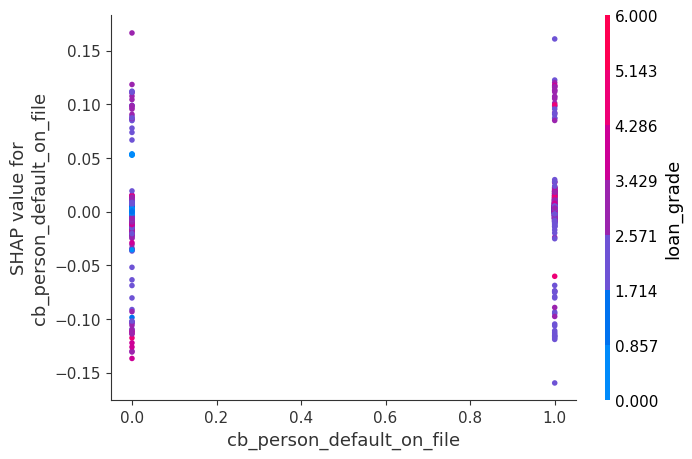

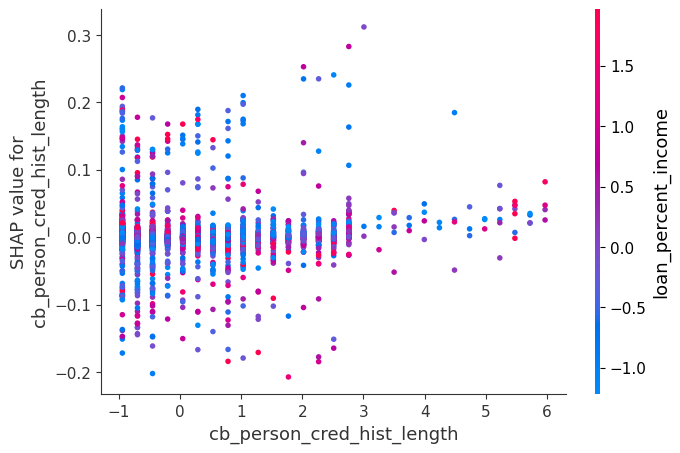

In [ ]:
#pour la classe non rembourse
for i in df1.columns:
  shap.dependence_plot(i, shap_values[1], x_test)

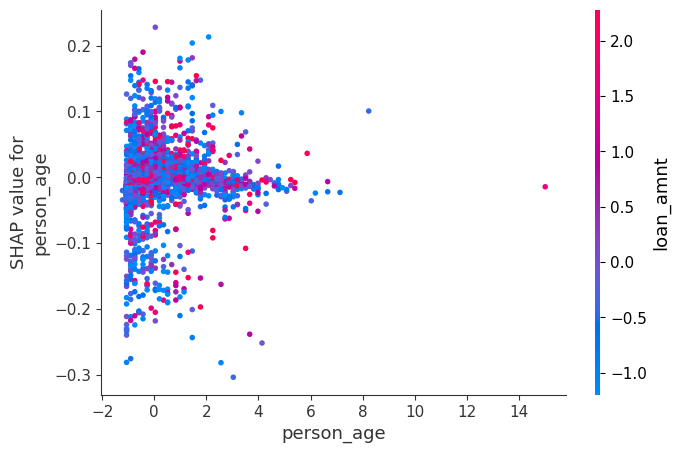

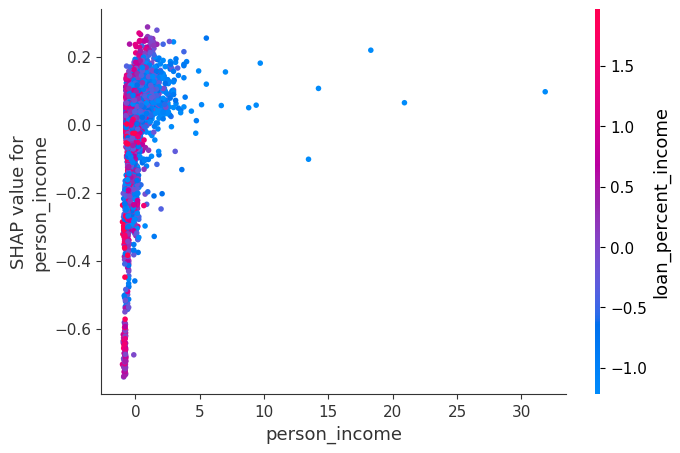

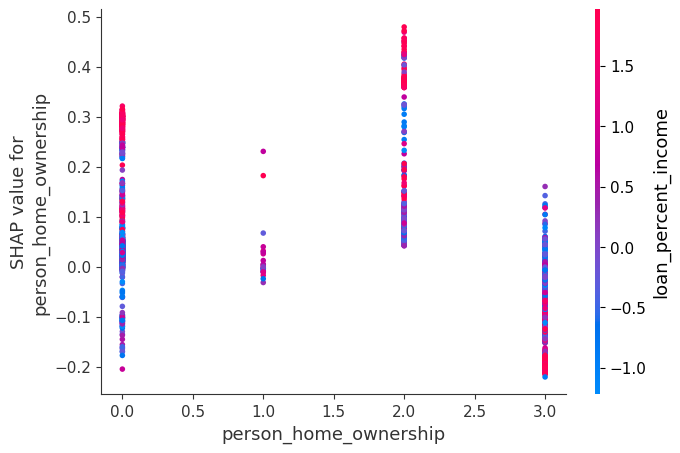

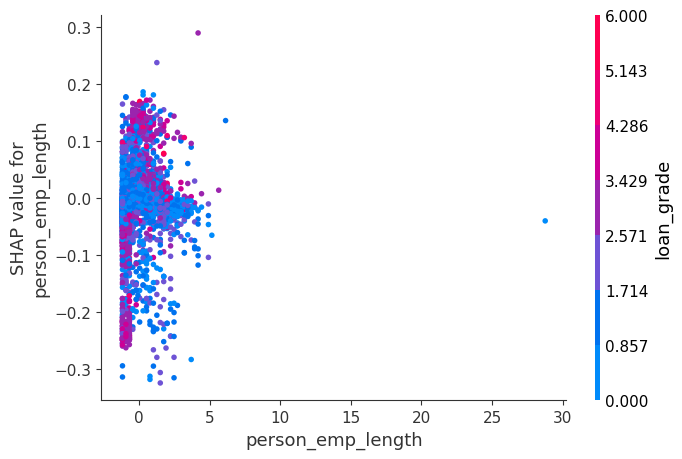

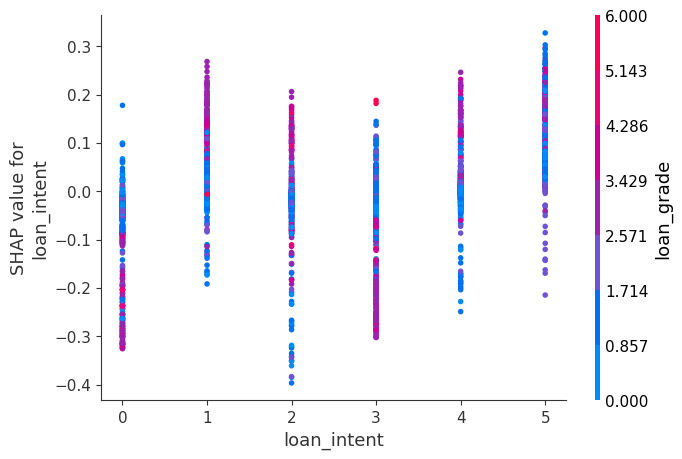

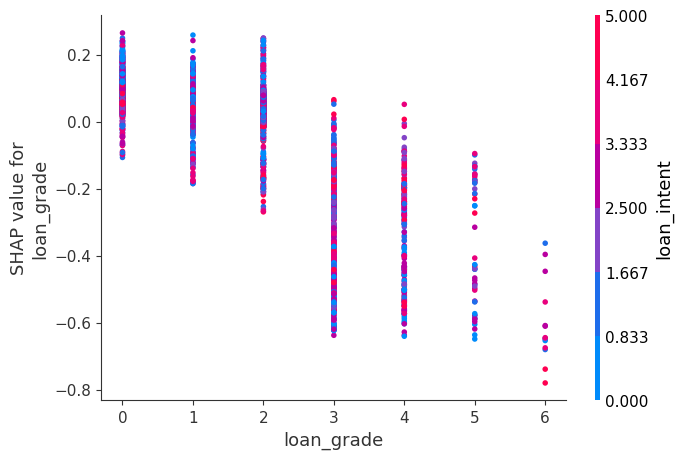

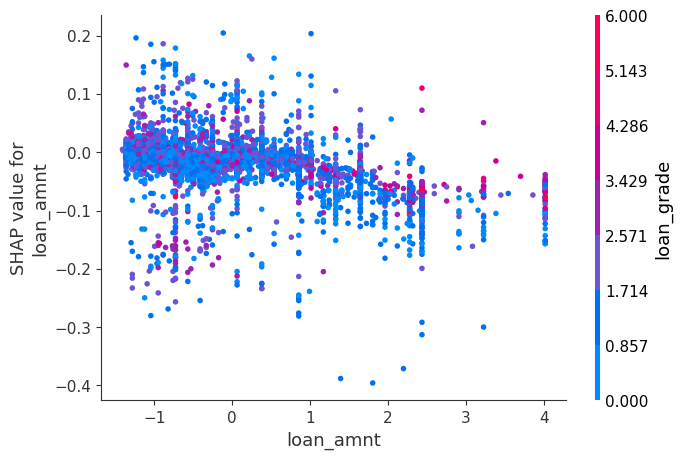

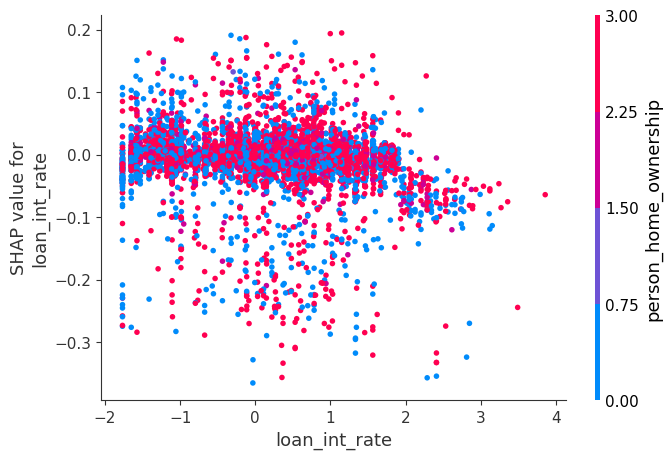

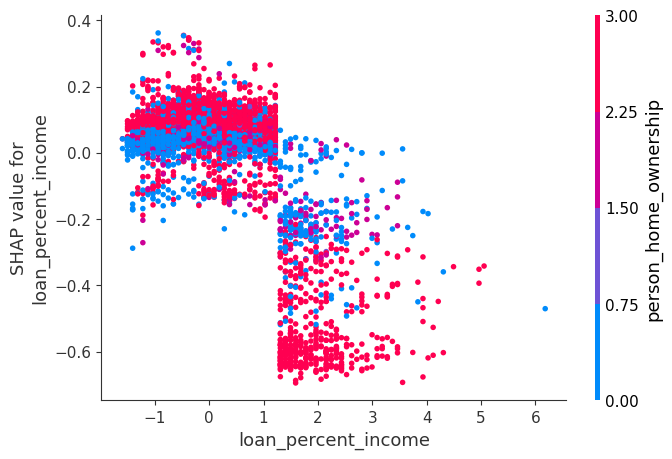

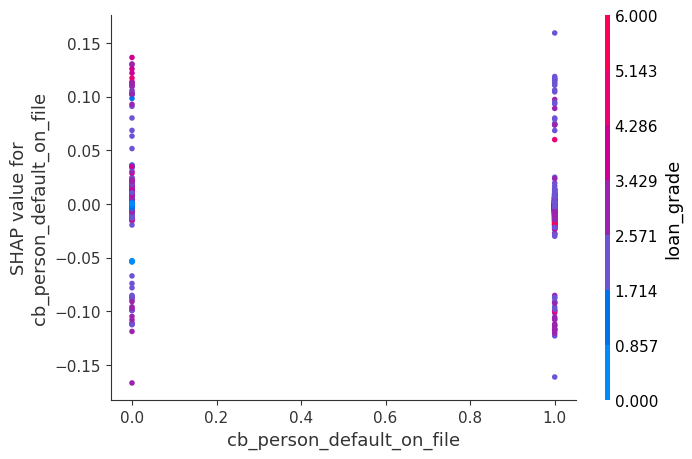

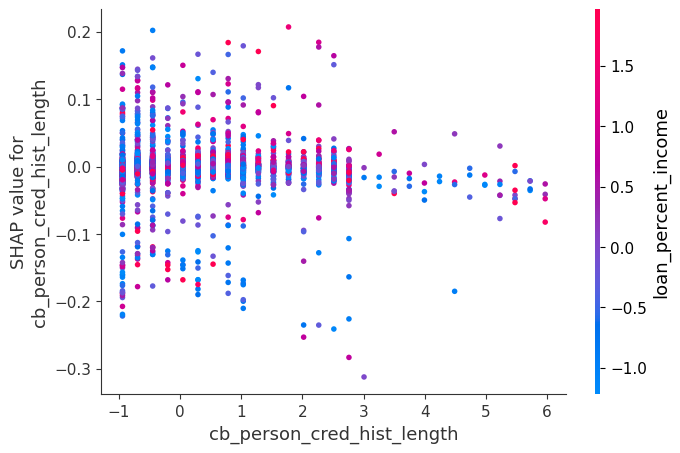

In [ ]:
#poir la classe rembourse
for i in df1.columns:
  shap.dependence_plot(i, shap_values[0], x_test)

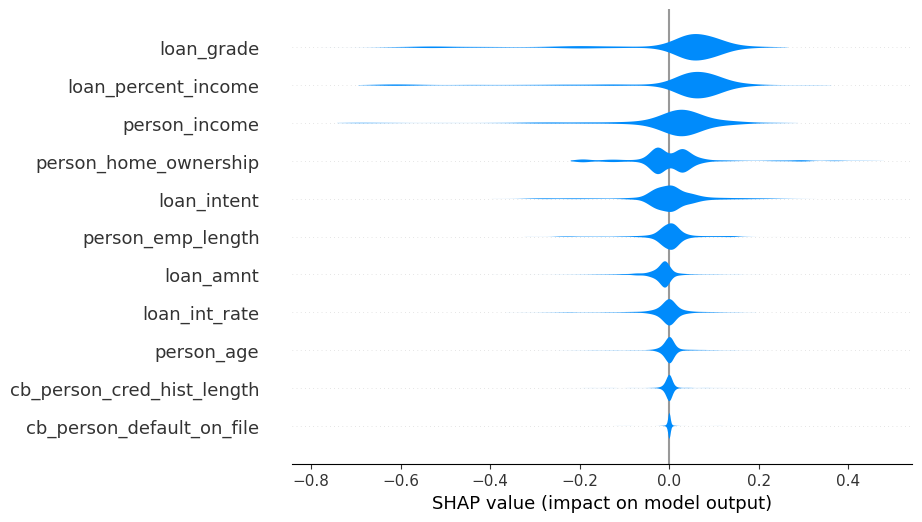

In [ ]:
#pour la classe rembourse
shap.plots.violin(shap_values[0],feature_names, show=True)


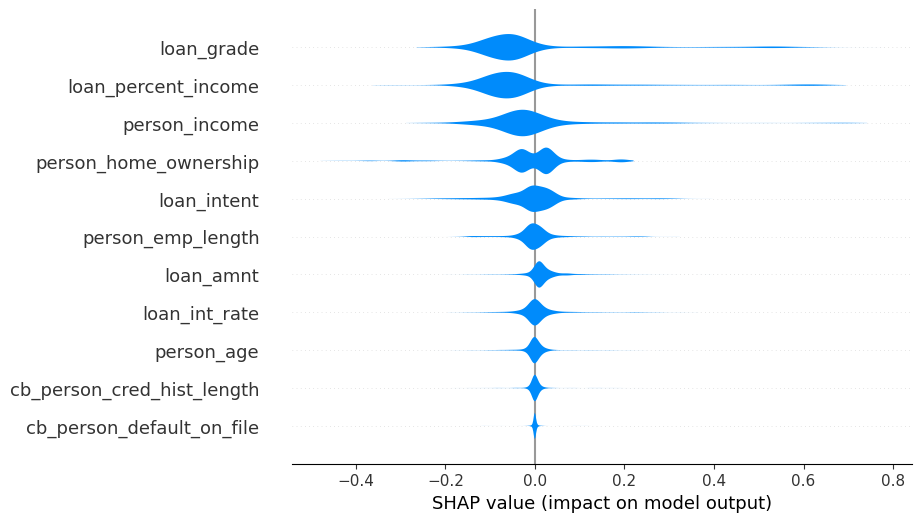

In [ ]:
#pour la classe non rembourse
shap.plots.violin(shap_values[1],feature_names, show=True)

# b-lime

In [ ]:
# pip install lime

In [ ]:
# import lime
# from lime import lime_tabular

# explainer = lime_tabular.LimeTabularExplainer(
#     training_data=np.array(x_train),
#     feature_names=x_train.columns,
#     class_names=['non rembourse', 'rembourse'],
#     mode='classification'
# )

In [ ]:
# exp = explainer.explain_instance(
#     data_row=x_test.iloc[1],
#     predict_fn=model.predict_proba
# )

# exp.show_in_notebook(show_table=True)

In [ ]:
# exp = explainer.explain_instance(
#     data_row=x_test.iloc[4],
#     predict_fn=model.predict_proba
# )

# exp.show_in_notebook(show_table=True)

c-eli5

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=337c15f340bf781f4bef102abb19dbccf23ed5a27d7aa76eea29b6e65b00ab74
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
# Calcul de l'importance des caractéristiques avec PermutationImportance
# perm = PermutationImportance(model).fit(x_test, y_test)


In [ ]:
# Affichage de l'importance des caractéristiques avec eli5
# eli5.show_weights(perm, feature_names=feature_names)


#2- SVM

In [ ]:
import shap
from sklearn import svm



# Entraîner le modèle SVM
# model = svm.SVC(kernel='rbf', probability=True)
# model.fit(x_train, y_train)

# Créer un explainer SHAP
explainer = shap.KernelExplainer(model.predict_proba, x_test[1:30])

# Calculer les valeurs SHAP pour un exemple spécifique
sample_idx = 0
shap_values = explainer.shap_values(x_test[sample_idx:sample_idx+1])

# Afficher les contributions SHAP
shap.initjs()



X does not have valid feature names, but SVC was fitted with feature names


  0%|          | 0/1 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names


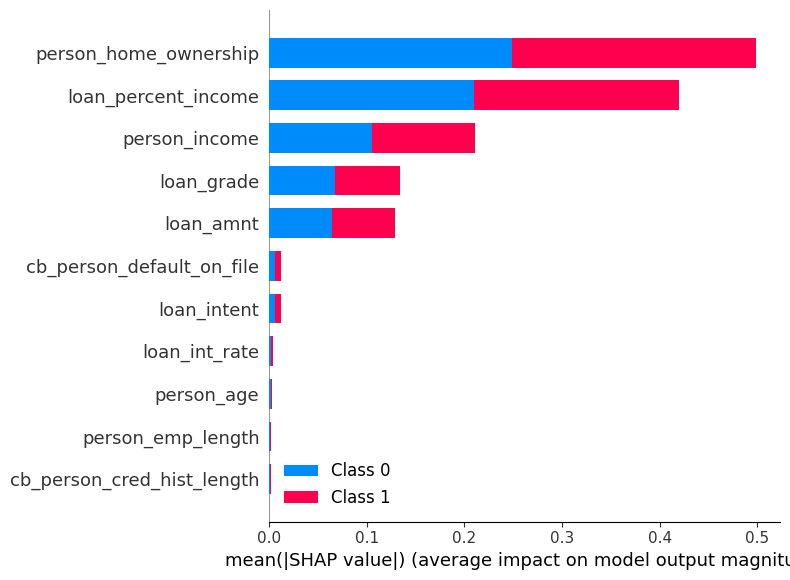

In [ ]:

# Affichage des valeurs SHAP pour les premières observations
shap.summary_plot(shap_values, x_test)

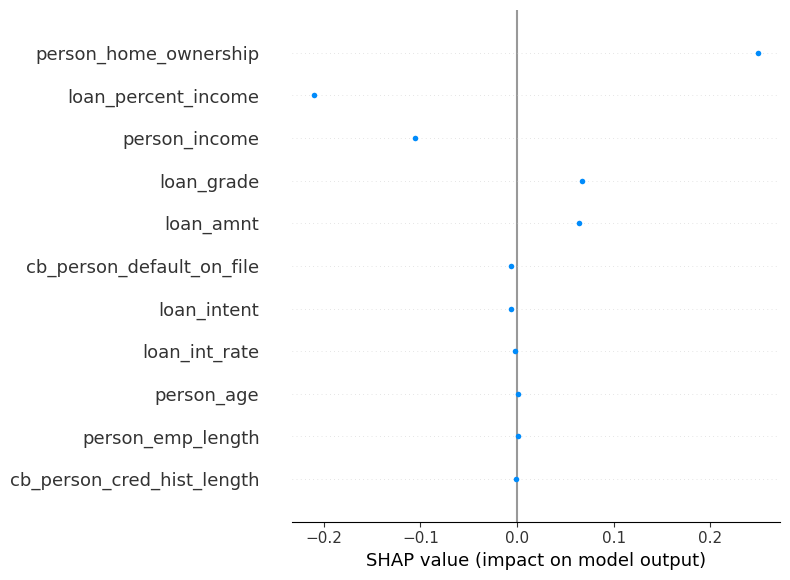

In [ ]:

shap.summary_plot(shap_values[0],feature_names)

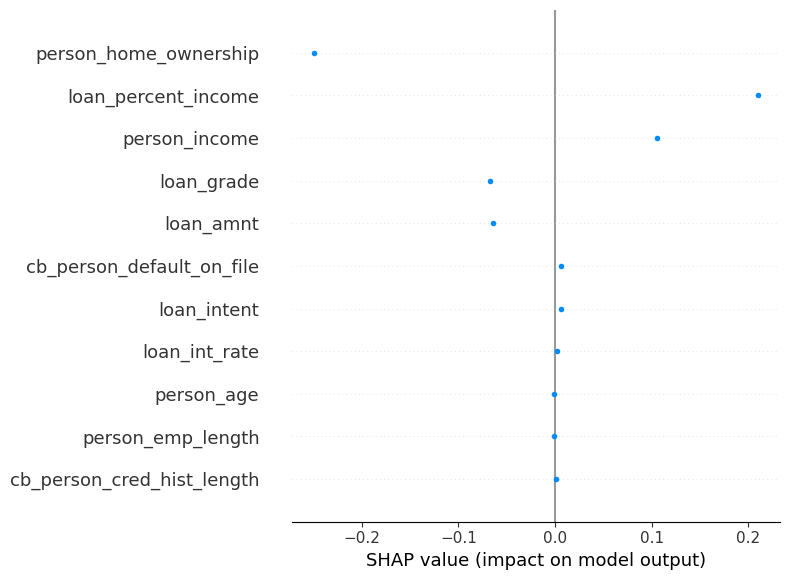

In [ ]:

# Affichage des valeurs SHAP pour les premières observations
shap.summary_plot(shap_values[1], feature_names)

In [ ]:
# Calcul de l'importance des caractéristiques avec PermutationImportance
perm = PermutationImportance(svmc).fit(x_test, y_test)


In [ ]:
# Affichage de l'importance des caractéristiques avec eli5
eli5.show_weights(perm, feature_names=feature_names)


In [ ]:
#diagramme force empile
shap.plots.initjs()
shap.plots.force(explainer.expected_value[0],shap_values[0],feature_names)

In [ ]:
shap.plots.initjs()
shap.plots.force(explainer.expected_value[1],shap_values[0],feature_names)

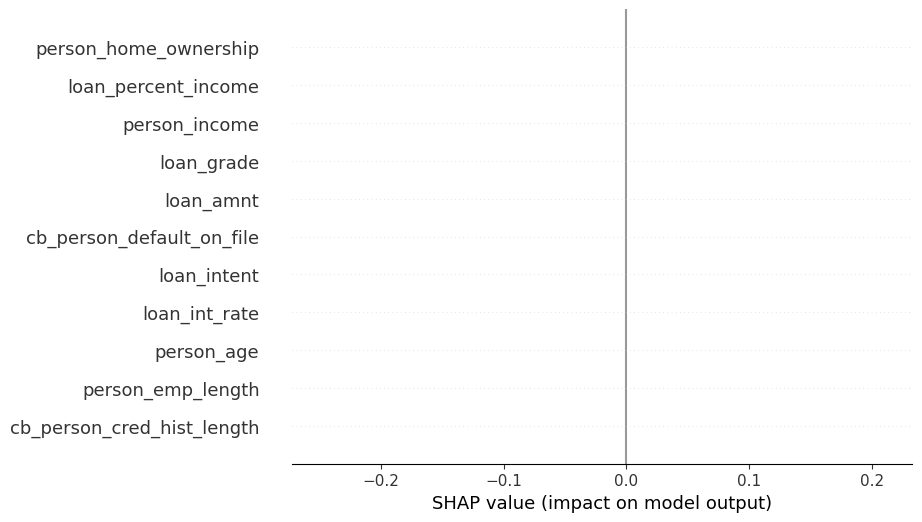

In [ ]:
shap.plots.violin(shap_values[1],feature_names, show=True)

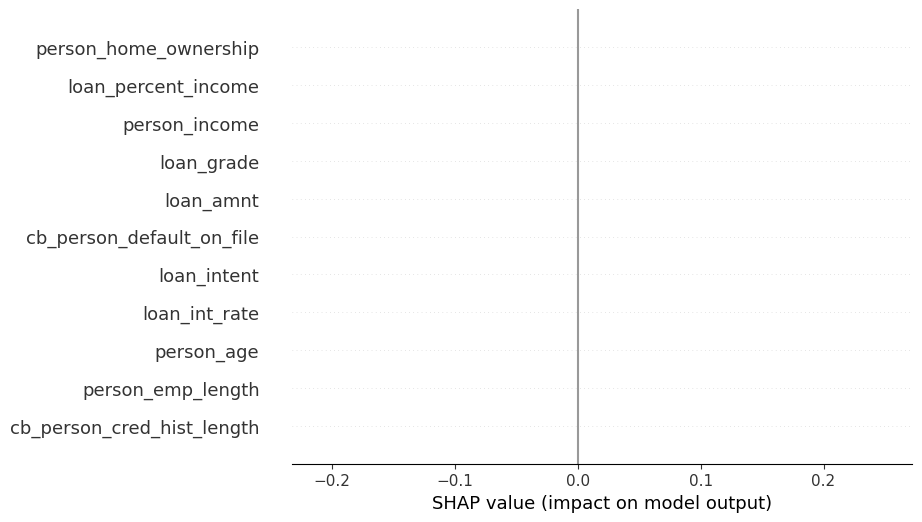

In [ ]:
shap.plots.violin(shap_values[0],feature_names, show=True)

# 3-REGRESSION LOGISTIQUE

In [ ]:
shap.initjs()
explainer = shap.KernelExplainer(model_lg.predict, x_test[1:100])
shap_values = explainer.shap_values(x_test[1:100])


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


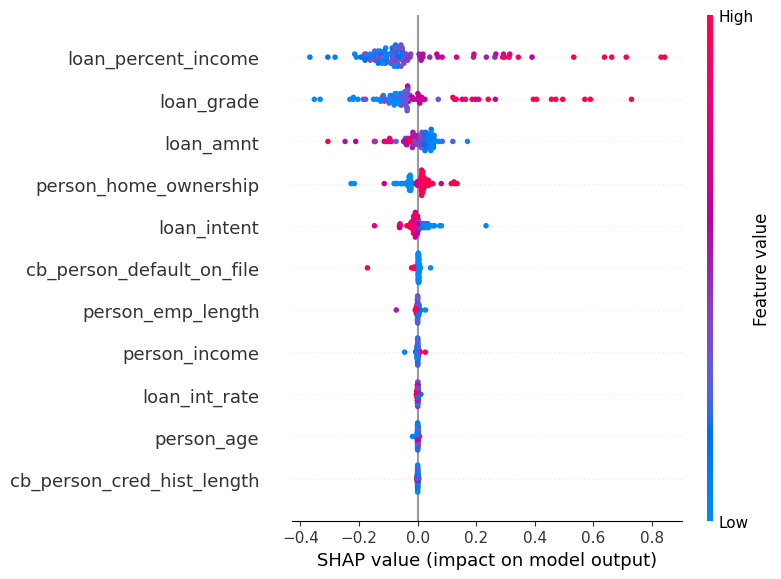

In [ ]:
shap.summary_plot(shap_values, x_test[1:100])

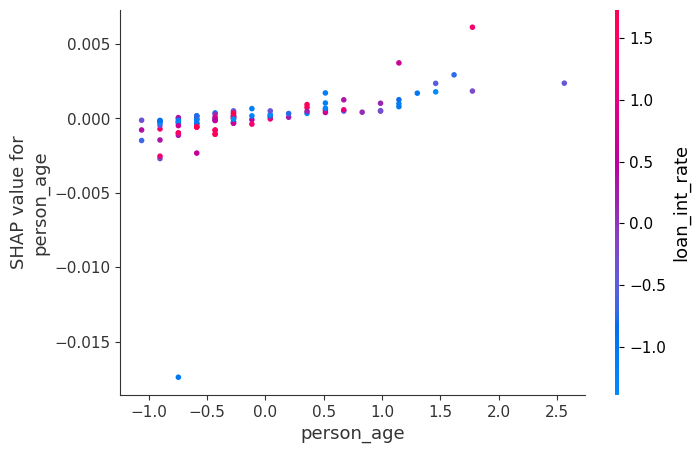

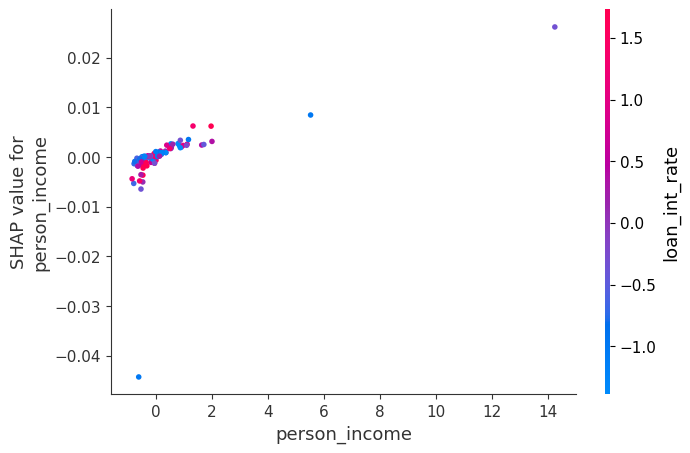

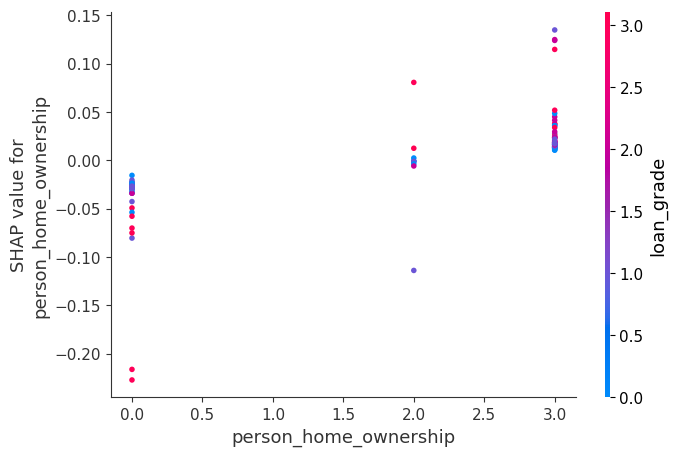

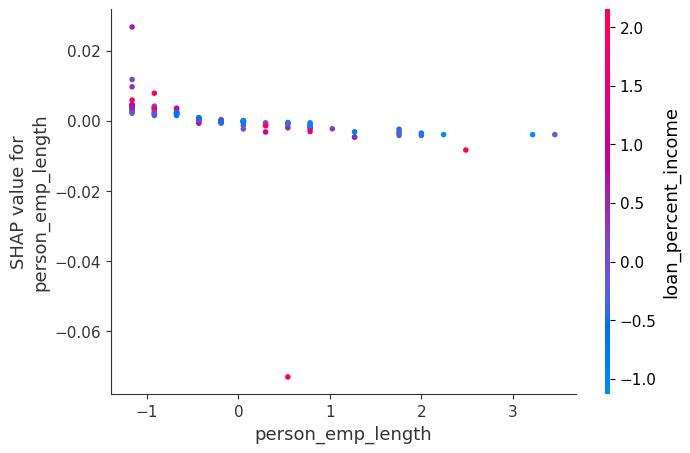

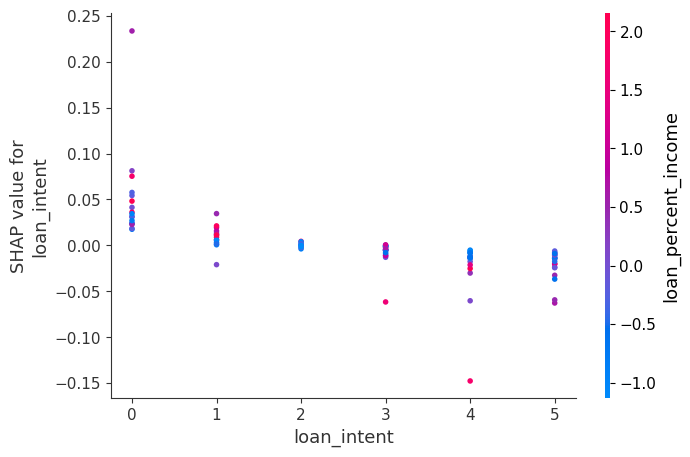

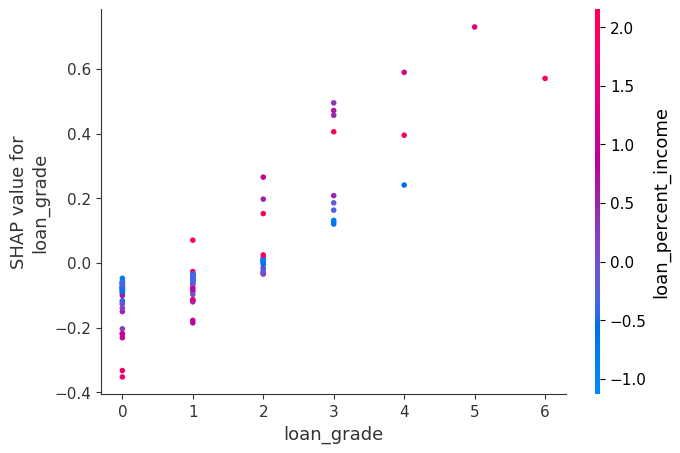

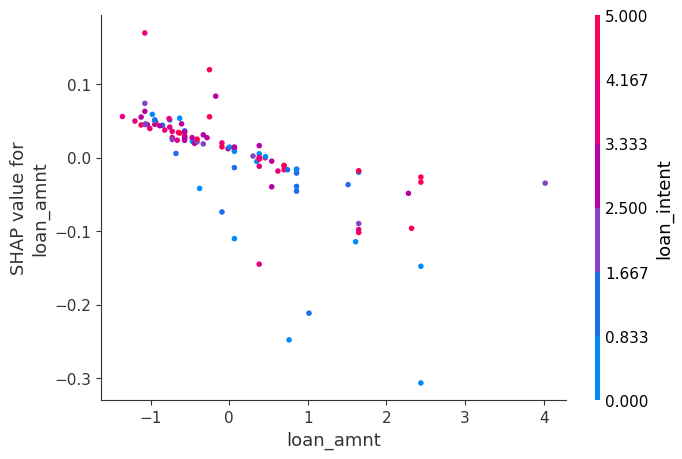

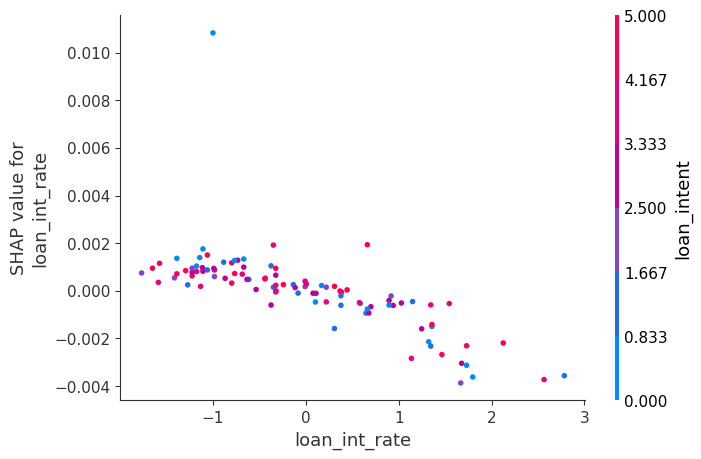

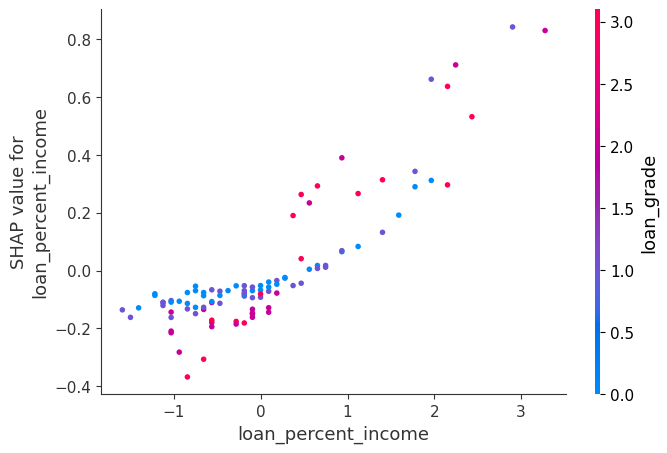

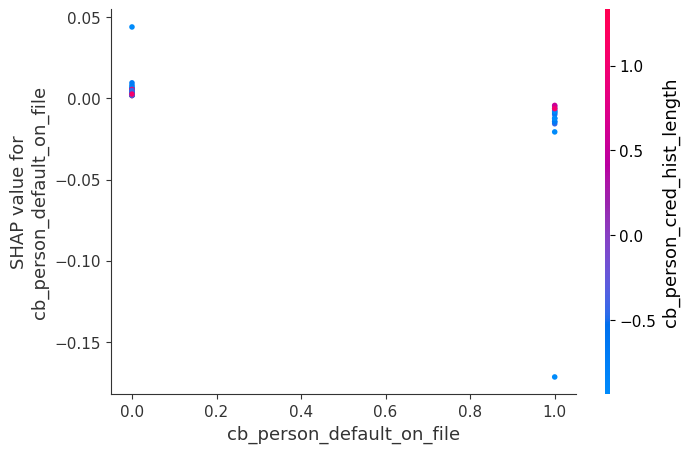

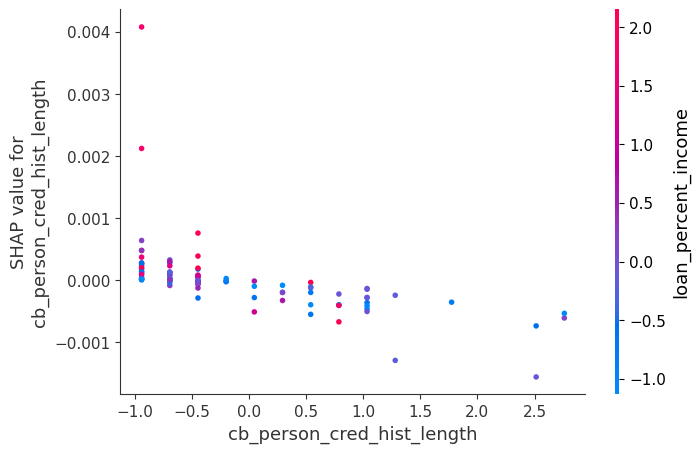

In [ ]:
for i in df1.columns:
  shap.dependence_plot(i, shap_values, x_test[1:100])

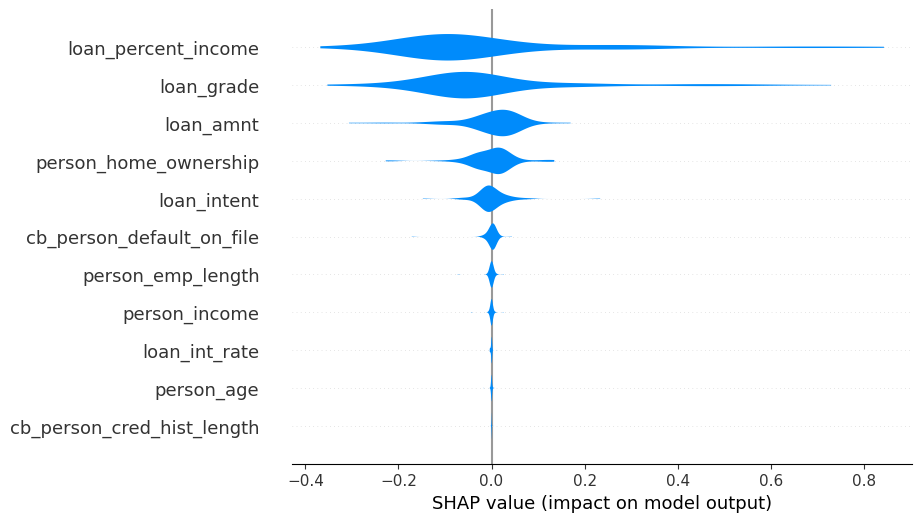

In [ ]:
shap.plots.violin(shap_values,feature_names, show=True)

# 4-RANDOM FOREST

In [ ]:
rf.fit(x_train,y_train)
explainer = shap.KernelExplainer(rf.predict, x_test[1:20],feature_names=df1.columns)
shap_values = explainer.shap_values(x_test[1:20])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


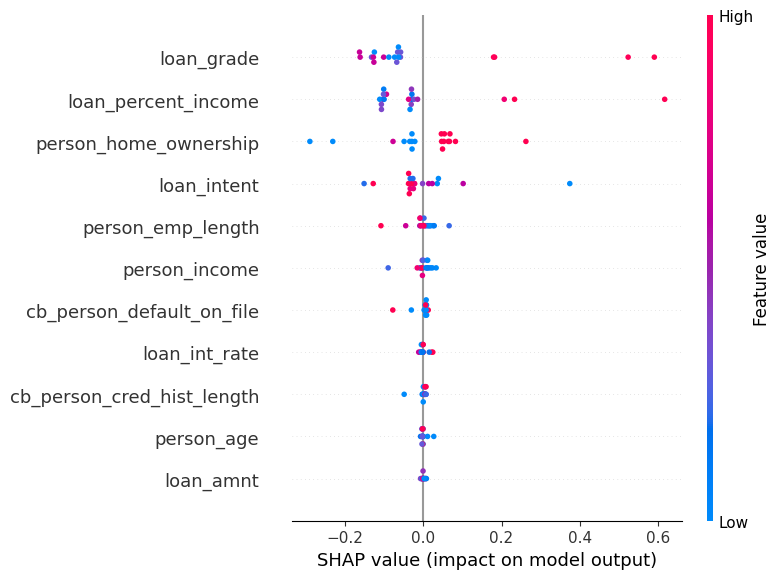

In [ ]:
shap.summary_plot(shap_values, x_test[1:20])

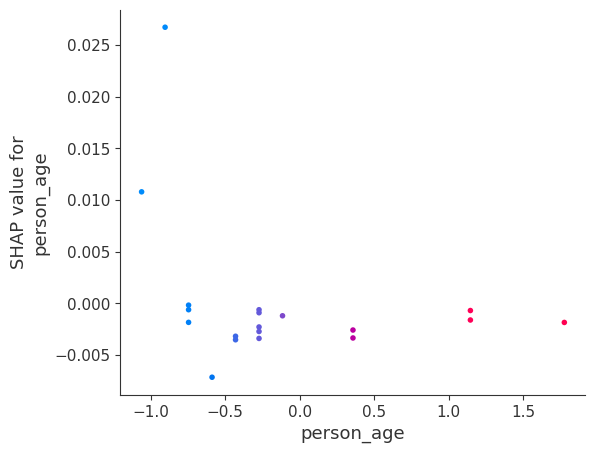

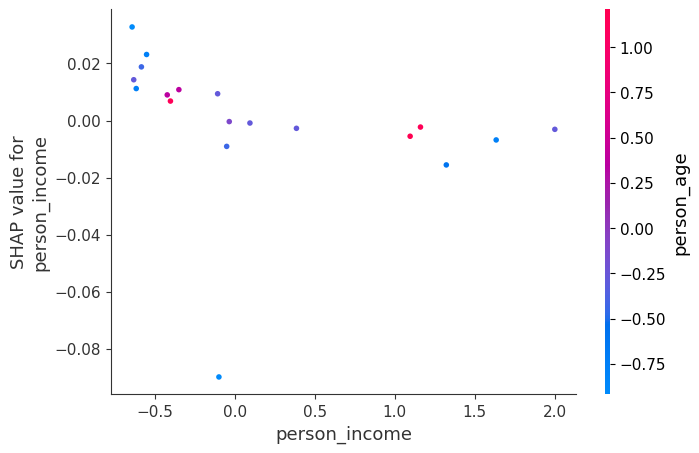

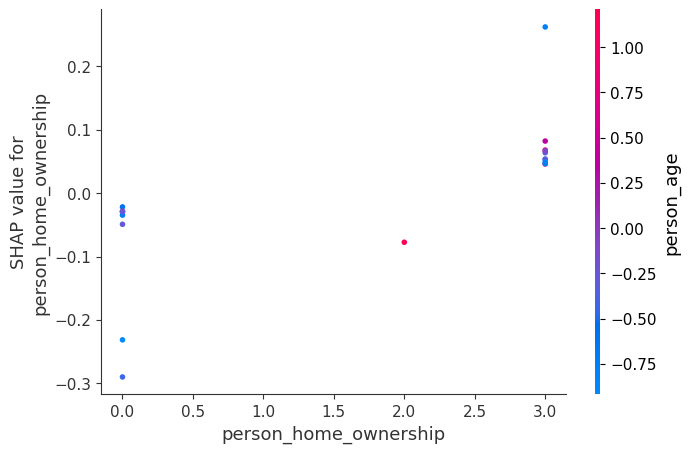

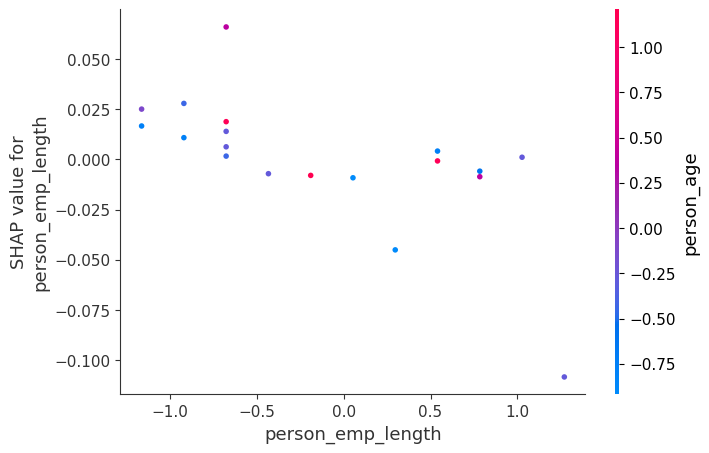

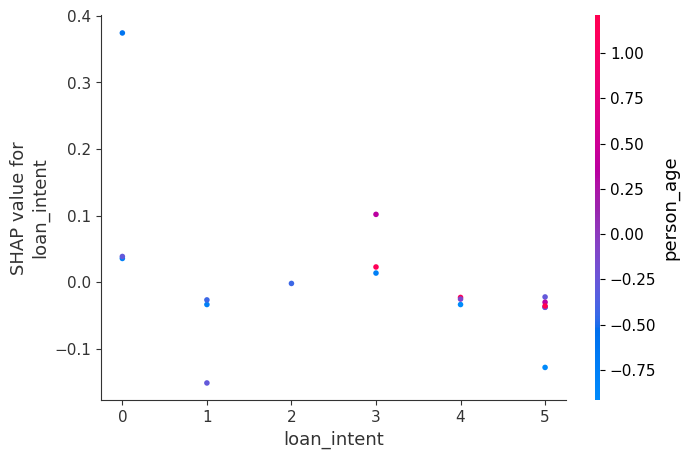

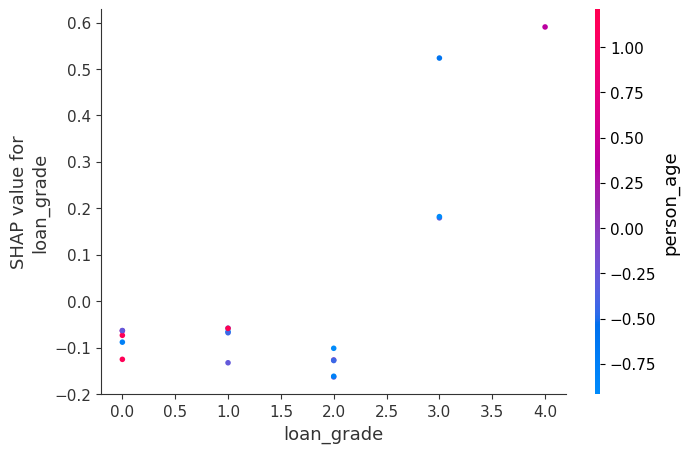

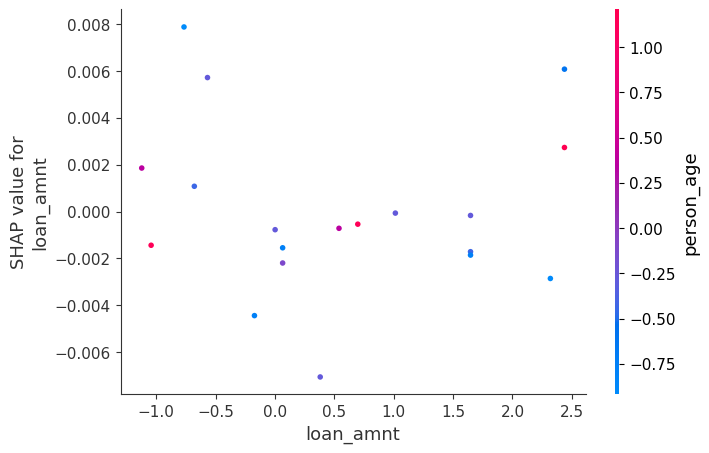

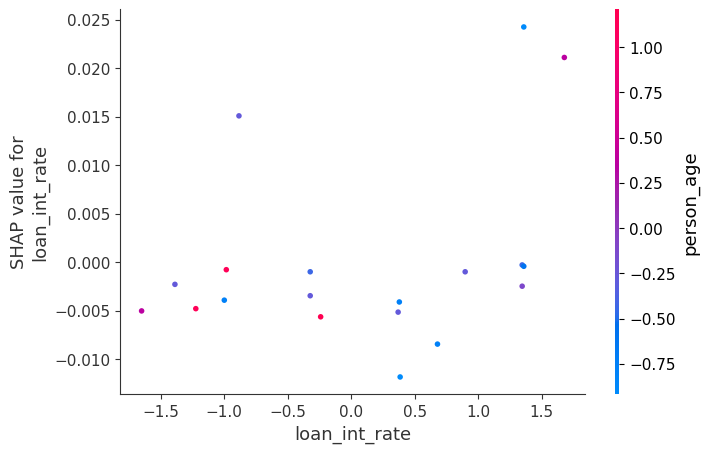

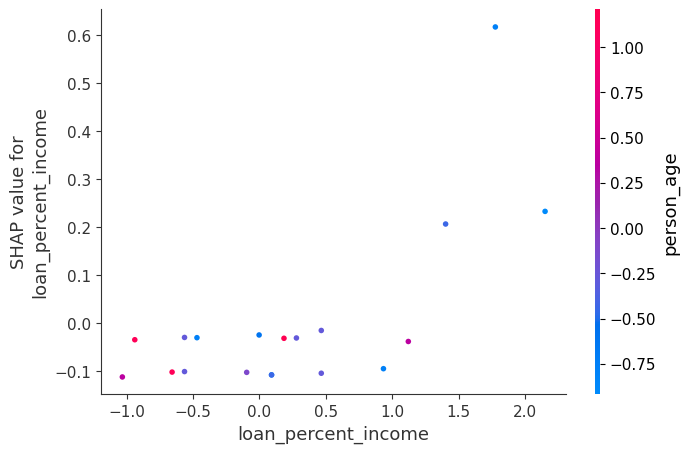

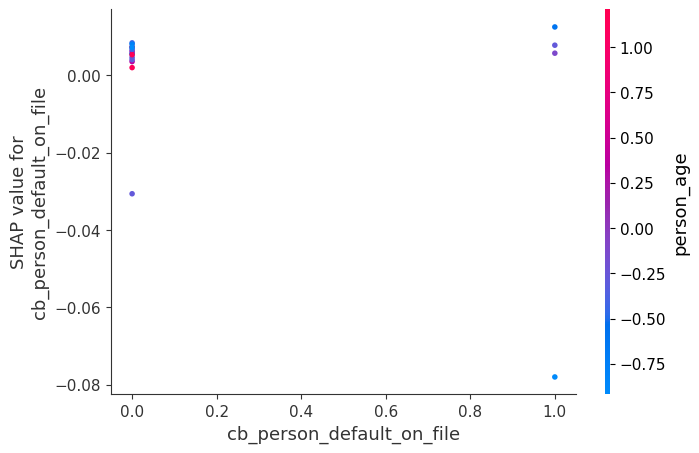

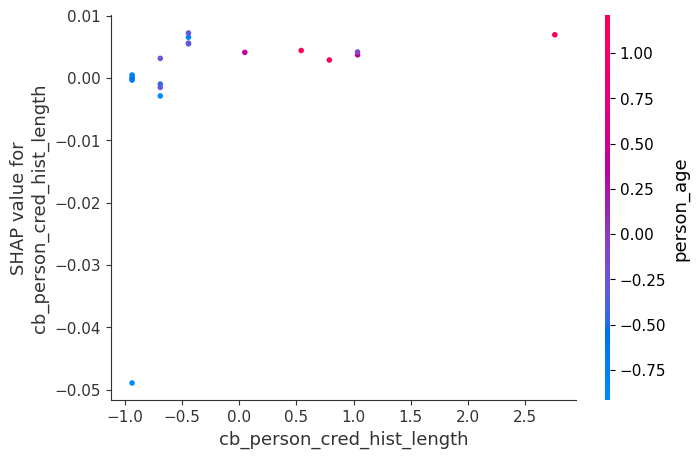

In [ ]:
for i in df1.columns:
  shap.dependence_plot(i, shap_values, x_test[1:20])

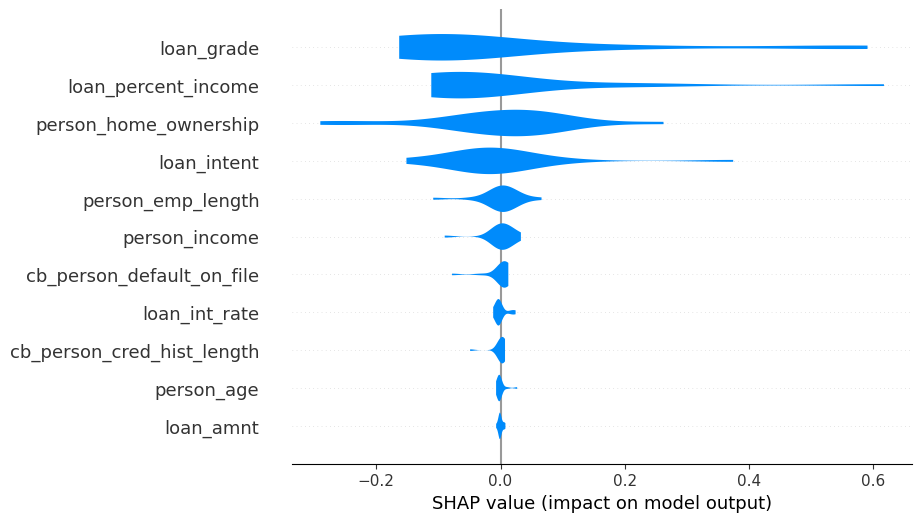

In [ ]:
shap.plots.violin(shap_values,feature_names, show=True)

# 5- XGBOOST

In [ ]:
explainer = shap.TreeExplainer(bst)
#shap_values = explainer(X)
shap_values = explainer.shap_values(x_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


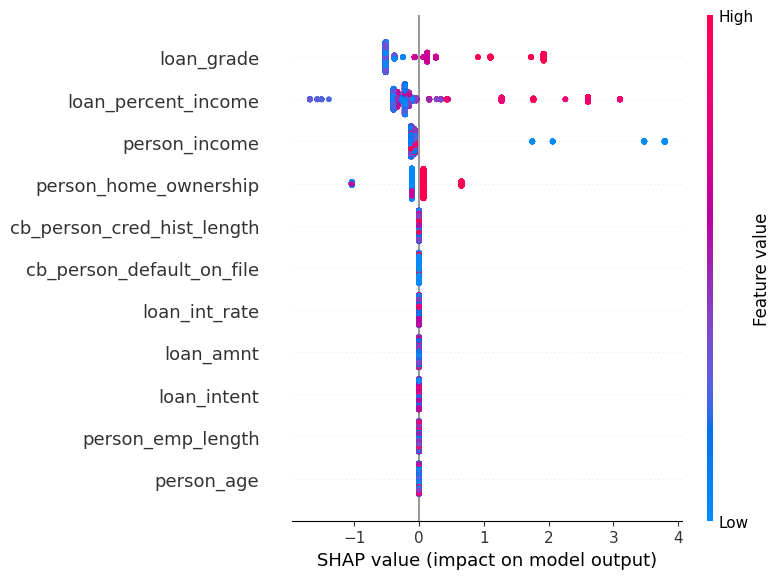

In [ ]:
shap.summary_plot(shap_values, x_test)

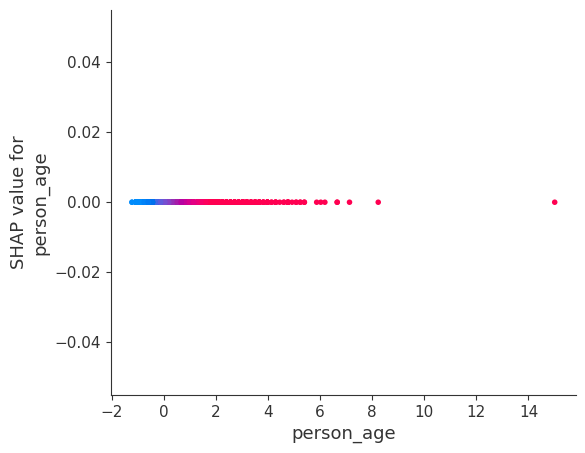

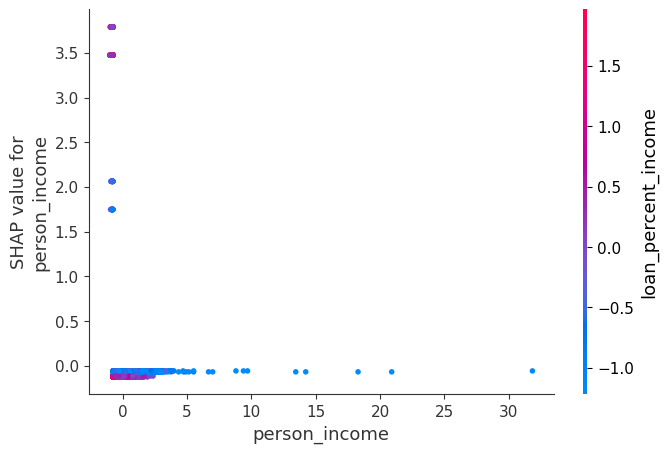

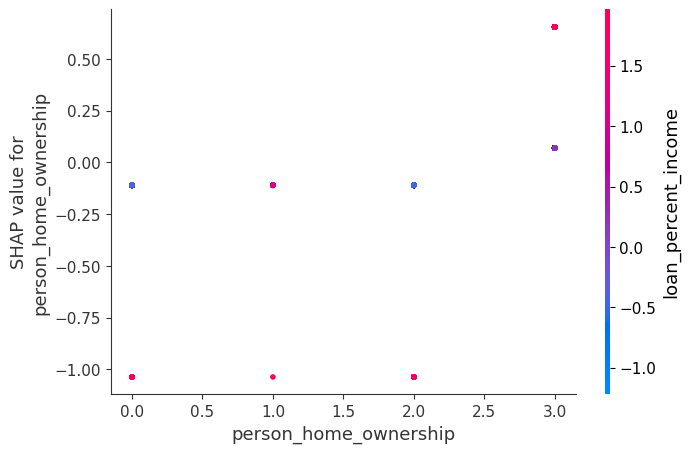

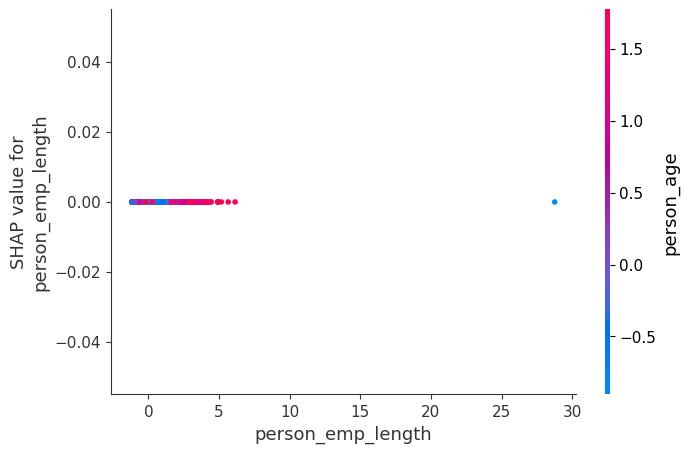

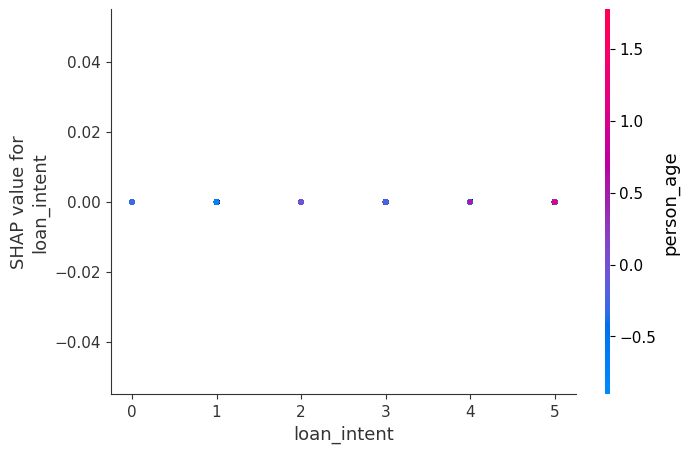

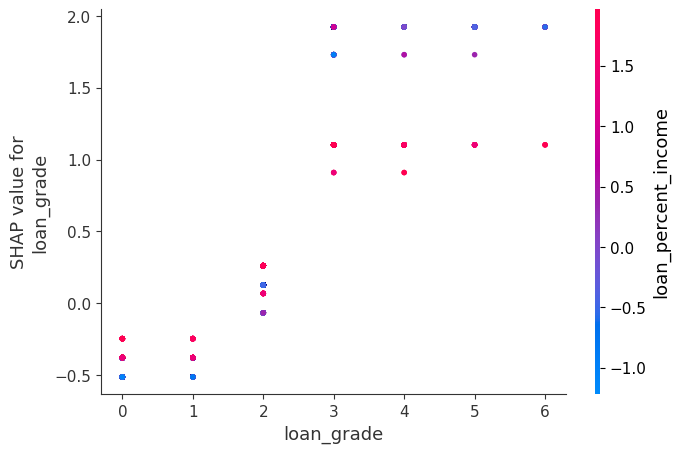

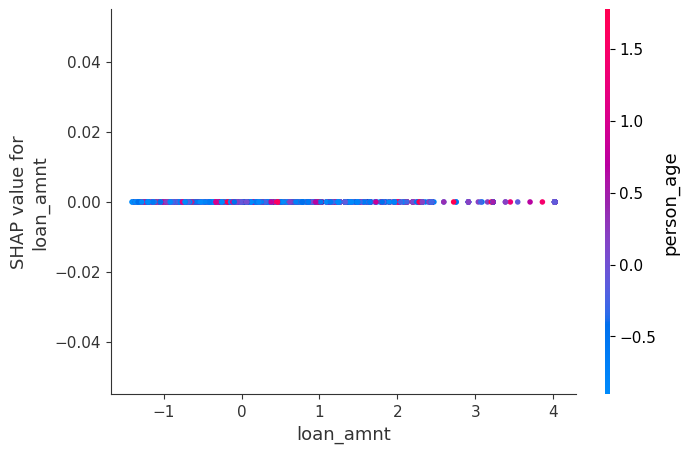

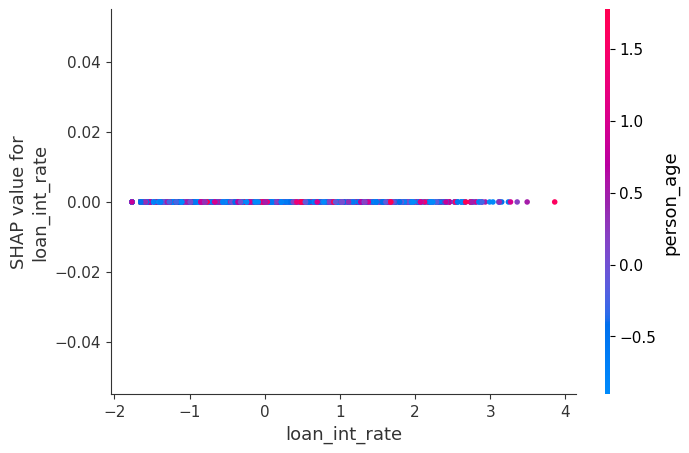

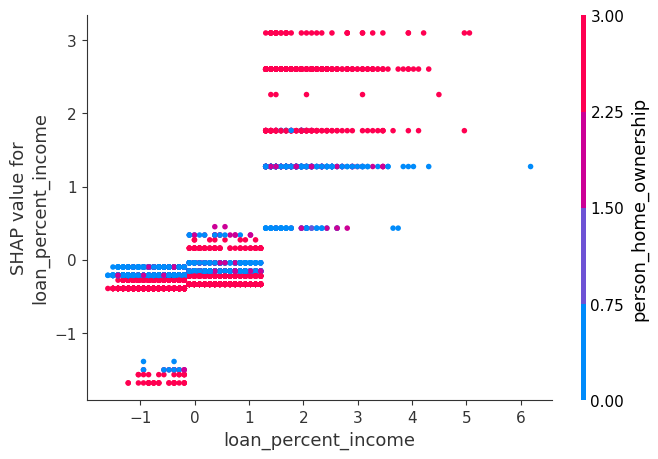

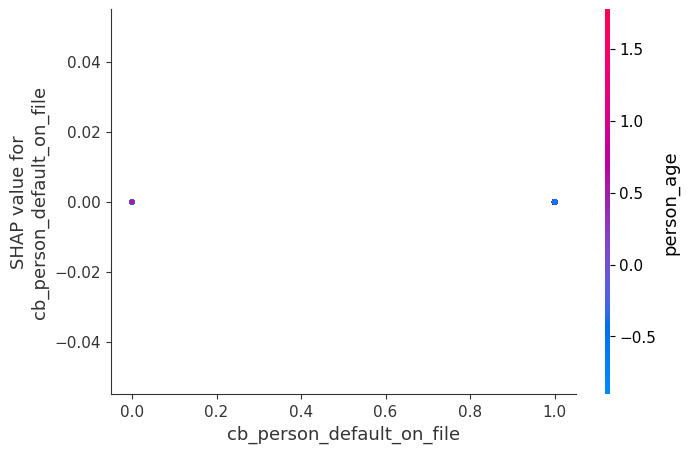

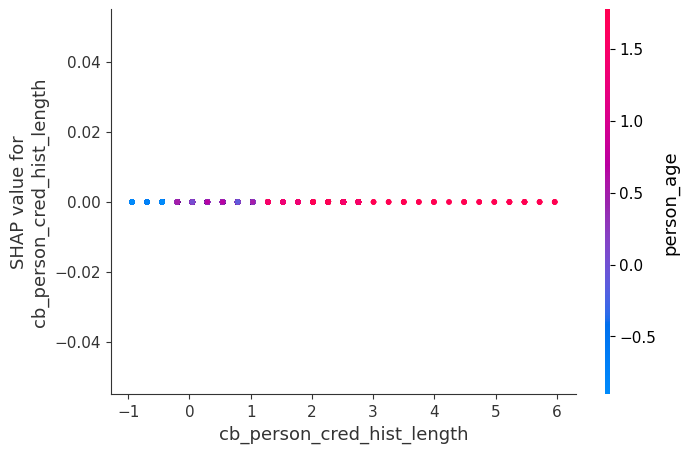

In [ ]:
for i in df1.columns:
  shap.dependence_plot(i, shap_values, x_test)


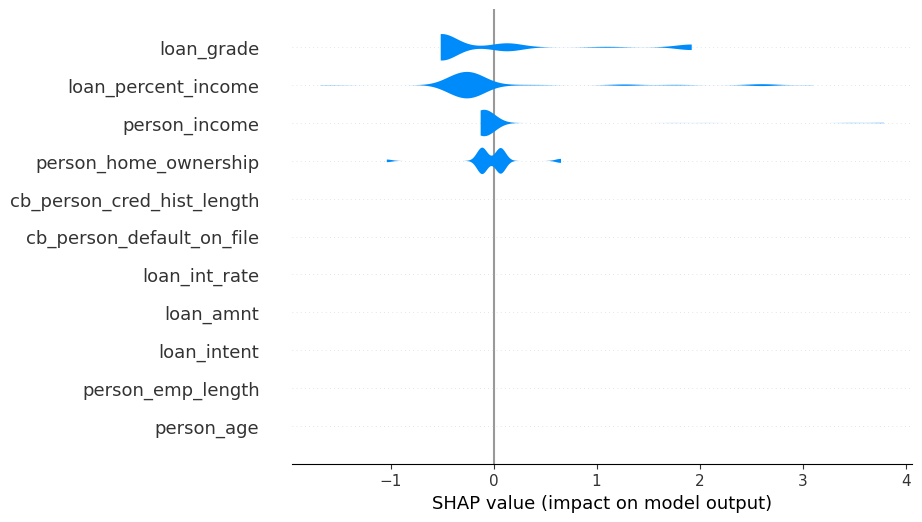

In [ ]:
shap.plots.violin(shap_values,feature_names, show=True)
